# NewMet Data Week 2 Progress Report

1. Merged Census data and Political Afflication into 1 file
2. Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections as cl
import itertools as it
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
#list all parameters by "print(plt.rcParams)" command
plt.rcParams['figure.figsize'] = (7.5, 7.5)
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'w'

# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1.5)

## 1. Data Integration

In [2]:
df_0 = pd.read_csv('./data/ppddisposal2007_2013_demogracehh_final.csv')

In [3]:
df_0.pop('Unnamed: 0')
for col in df_0.columns[:-5:-1]:
    df_0.pop(col)

In [4]:
print df_0.shape
df_0.head(5)

(425, 81)


County            Jurisdiction  Num_RecyclingProg_2007  \
0  San Bernardino                Adelanto                      35   
1     Los Angeles            Agoura Hills                      30   
2         Alameda                 Alameda                      45   
3         Alameda  Alameda-Unincorporated                      44   
4         Alameda                  Albany                      41   

   Target_ResPPD_2007  Annual_ResPPD_2007  Target_EmpPPD_2007  \
0                 6.9                 4.8                40.6   
1                 7.0                 6.6                15.2   
2                 5.5                 3.8                21.4   
3                 4.9                 3.9                19.8   
4                 5.0                 2.9                19.3   

   Annual_EmpPPD_2007  Num_RecyclingProg_2008  Target_ResPPD_2008  \
0                31.7                      35                 6.9   
1                13.1                      32                 7.0   
2                13.8                      45                 5.5   
3                16.0                      44                 4.9   
4                11.0                      41                 5.0   

   Annual_ResPPD_2008              ...               SomeOtherRace  \
0                 3.8              ...                        8337   
1                 5.7              ...                         590   
2                 3.6              ...                        2463   
3                 3.6              ...                         NaN   
4                 2.3              ...                         607   

   TotalPopulationInHouseholds  Householder  Spouse  Children  \
0                        30012         7809    4000     12641   
1                        20242         7327    4565      6721   
2                        72316        30123   13440     19626   
3                          NaN          NaN     NaN       NaN   
4                        18454         7401    3801      5388   

   ChildrenOwnChildUnder18y  OtherRelatives  OtherRelativesUnder18y  \
0                      9693            3806                    1816   
1                      4682             745                     155   
2                     14034            4531                    1091   
3                       NaN             NaN                     NaN   
4                      4442             770                     158   

   NonRelatives  NonRelativesUnmarriedPartner  
0          1756                           827  
1           884                           299  
2          4596                          2140  
3           NaN                           NaN  
4          1094                           464  

[5 rows x 81 columns]

Check how many rows have nan values

In [5]:
df_0['Jurisdiction'] = df_0['Jurisdiction'].str.strip() #.str.lower()
cl.Counter(pd.isnull(df_0['SomeOtherRace']))

Counter({False: 331, True: 94})

Some columns are not organized well now. So I will 1) remove those columns and 2) merge again.

In [6]:
for col in df_0.columns[:37:-1]:
    df_0.pop(col)
#     print col

In [7]:
df_1 = pd.ExcelFile(io='./data/merged_wendy_census_renamed_col_v2.xlsx')
df_1 = df_1.parse("Sheet1")
df_1 = df_1[pd.notnull(df_1['Geography'])]
df_1
# df_1['Geography'].str.replace('CDP', '') #df_1['Geography'] = 

Geography  Population      Male    Female  \
0                                 California     37253956  18517830  18736126   
2                              Alameda County     1510271    740573    769698   
3                               Alameda city        73812     35315     38497   
4                                Albany city        18539      8821      9718   
5                                Ashland CDP        21925     10691     11234   
6                              Berkeley city       112580     55031     57549   
7                          Castro Valley CDP        61388     29827     31561   
8                             Cherryland CDP        14728      7433      7295   
9                                Dublin city        46036     23983     22053   
10                           Emeryville city        10080      4983      5097   
11                              Fairview CDP        10003      4948      5055   
12                              Fremont city       214089    106441    107648   
13                              Hayward city       144186     71143     73043   
14                            Livermore city        80968     40194     40774   
15                               Newark city        42573     21217     21356   
16                              Oakland city       390724    189519    201205   
17                             Piedmont city        10667      5188      5479   
18                           Pleasanton city        70285     34444     35841   
19                          San Leandro city        84950     40781     44169   
20                           San Lorenzo CDP        23452     11441     12011   
21                                 Sunol CDP          913       459       454   
22                               Union City         69516     34318     35198   
24                              Alpine County        1175       606       569   
25                        Alpine Village CDP          114        56        58   
26                           Bear Valley CDP          121        67        54   
27                              Kirkwood CDP           97        58        39   
28                          Markleeville CDP          210       106       104   
29                            Mesa Vista CDP          200        97       103   
31                              Amador County       38091     20749     17342   
32                              Amador City           185        90        95   
...                                       ...         ...       ...       ...   
1612                        Santa Susana CDP         1037       532       505   
1613                             Saticoy CDP         1029       537       492   
1614                        Simi Valley city       124237     61043     63194   
1615                      Thousand Oaks city       126683     61989     64694   
1617                              Yolo County      200849     97935    102914   
1618                          Clarksburg CDP          418       207       211   
1619                              Davis city        65622     31178     34444   
1620                            Dunnigan CDP         1416       675       741   
1621                             Esparto CDP         3108      1558      1550   
1622                              Guinda CDP          254       129       125   
1623                     Knights Landing CDP          995       518       477   
1624                             Madison CDP          503       267       236   
1625                      Monument Hills CDP         1542       798       744   
1626      University of California Davis CDP         5786      2610      3176   
1627                    West Sacramento city        48744     24087     24657   
1628                            Winters city         6624      3351      3273   
1629                           Woodland city        55468     27317     28151   
1630                                Yolo CDP          450       214

In [8]:
df_1 = df_1.drop(df_1.index[0])
df_1 = df_1[~df_1['Geography'].str.contains("County")]
df_1['Geography'] = df_1['Geography'].str.replace('CDP','').str.replace('city','').str.strip() #str.lower().

for col in df_1.columns[:-11:-1]:
    df_1.pop(col)
    #     print col
df_1

Geography  Population    Male  Female  \
3                            Alameda       73812   35315   38497   
4                             Albany       18539    8821    9718   
5                            Ashland       21925   10691   11234   
6                           Berkeley      112580   55031   57549   
7                      Castro Valley       61388   29827   31561   
8                         Cherryland       14728    7433    7295   
9                             Dublin       46036   23983   22053   
10                        Emeryville       10080    4983    5097   
11                          Fairview       10003    4948    5055   
12                           Fremont      214089  106441  107648   
13                           Hayward      144186   71143   73043   
14                         Livermore       80968   40194   40774   
15                            Newark       42573   21217   21356   
16                           Oakland      390724  189519  201205   
17                          Piedmont       10667    5188    5479   
18                        Pleasanton       70285   34444   35841   
19                       San Leandro       84950   40781   44169   
20                       San Lorenzo       23452   11441   12011   
21                             Sunol         913     459     454   
22                        Union City       69516   34318   35198   
25                    Alpine Village         114      56      58   
26                       Bear Valley         121      67      54   
27                          Kirkwood          97      58      39   
28                      Markleeville         210     106     104   
29                        Mesa Vista         200      97     103   
32                       Amador City         185      90      95   
33                          Buckhorn        2429    1250    1179   
34                       Buena Vista         429     197     232   
35              Camanche North Shore         979     503     476   
36                  Camanche Village         847     445     402   
...                              ...         ...     ...     ...   
1610                     Santa Paula       29321   14795   14526   
1611               Santa Rosa Valley        3334    1635    1699   
1612                    Santa Susana        1037     532     505   
1613                         Saticoy        1029     537     492   
1614                     Simi Valley      124237   61043   63194   
1615                   Thousand Oaks      126683   61989   64694   
1618                      Clarksburg         418     207     211   
1619                           Davis       65622   31178   34444   
1620                        Dunnigan        1416     675     741   
1621                         Esparto        3108    1558    1550   
1622                          Guinda         254     129     125   
1623                 Knights Landing         995     518     477   
1624                         Madison         503     267     236   
1625                  Monument Hills        1542     798     744   
1626  University of California Davis        5786    2610    3176   
1627                 West Sacramento       48744   24087   24657   
1628                         Winters        6624    3351    3273   
1629                        Woodland       55468   27317   28151   
1630                            Yolo         450     214     236   
1633                       Beale AFB        1319     656     663   
1634                    Camptonville         158      80      78   
1635           Challenge-Brownsville        1148     575     573   
1636                         Dobbins         624     338     286   
1637                           Linda       17773    8890    8883   
1638                       Loma Rica        2368    1176    1192   
1639                      Marysville       12072    6025    6047   
1640                      Olivehurst       13656    6846    6810   
1641           

In [9]:
# print df_0['Jurisdiction']
# print df_1['Geography']
df_1 = df_1.rename(columns={'Geography':'Jurisdiction'})
# print df_1['Jurisdiction']

# it.combinations([2676, 2041, 1623, 1888, 4588, 4582, 4576], 2):
# cl.Counter(df_0['Jurisdiction'].isin(df_1['Jurisdiction']))
cl.Counter(df_0['Population'].isin(df_1['Population']))

Counter({False: 94, True: 331})

Check if common column values from different dataframes are same

In [10]:
df_0['Jurisdiction']

print df_1['Jurisdiction'].values[0], df_0['Jurisdiction'].values[2]
print df_1['Jurisdiction'].values[0] == df_0['Jurisdiction'].values[2]

Alameda Alameda
True


In [11]:
join_df = pd.merge(df_0, df_1, on=['Jurisdiction','Population'], how='left')
# df_0 = df_0.join(df_1, on='Jurisdiction', lsuffix='Jurisdiction', rsuffix='Jurisdiction')
# join_df.sort(columns=['County'])
join_df#.iloc[0]#.columns
cl.Counter(pd.isnull(join_df['Vacant_units']))

Counter({False: 331, True: 94})

In [12]:
join_df.columns

Index([                   u'County',              u'Jurisdiction',
          u'Num_RecyclingProg_2007',        u'Target_ResPPD_2007',
              u'Annual_ResPPD_2007',        u'Target_EmpPPD_2007',
              u'Annual_EmpPPD_2007',    u'Num_RecyclingProg_2008',
              u'Target_ResPPD_2008',        u'Annual_ResPPD_2008', 
       ...
                    u'Vacant_units',            u'For_rent_units',
       u'Rented_not_occupied_units',            u'For_sale_units',
         u'Sold_not_occupied_units',            u'Seasonal_units',
                u'All_other_vacans',              u'VancancyRate',
            u'HomeownerVacancyRate',         u'RentalVacancyRate'],
      dtype='object', length=105)

Load data files (political affiliation & census data) to join 

In [13]:
df_2 = pd.read_csv('./data/vals_with_counties.csv')
df_2.pop('Unnamed: 0')
df_2['County'] = df_2['County'].str.strip()
df_3 = pd.read_csv('./data/voter_registration_county_2015_cleaned.csv')

In [14]:
print df_2.shape
df_2.head(5)

(58, 5)


MedianAge  MedianHouseholdIncome  MeanHouseholdIncome  PercentBachDegHghr  \
0       36.8                  72112                96982                41.8   
1       44.3                  58636                69097                31.2   
2       49.1                  53684                69891                19.3   
3       37.0                  43752                59081                24.4   
4       50.0                  55295                70161                21.2   

      County  
0    Alameda  
1     Alpine  
2     Amador  
3      Butte  
4  Calaveras

In [15]:
for col in df_3.columns:
    if df_3[col].dtype == np.object:
        df_3[col] = df_3[col].str.replace(',','')

In [16]:
for col in df_3.columns[1:]:
    df_3[col] = df_3[col].astype(int)
# df_3.dtypes

In [17]:
print df_3.shape
df_3.head(5)

(58, 11)


County  Eligible  Registered  Democratic  Republican  \
0    Alameda   1041505      807397      445946      107853   
1     Alpine       879         750         274         221   
2     Amador     26576       20425        6321        9007   
3      Butte    168113      118005       38707       42547   
4  Calaveras     35392       26869        8094       11252   

   American Independent  Green  Libertarian  Peace and Freedom  Other  \
0                 16613  10041         4228               2942  43669   
1                    30     12            5                  1      6   
2                   896    124          221                 56     60   
3                  4233   1454         1298                513   1748   
4                  1271    242          366                101    228   

   No Party Preference  
0               176105  
1                  201  
2                 3740  
3                27505  
4                 5315

Merge census data into current dataframe

In [18]:
join2_df = pd.merge(join_df, df_2, on='County', how='left')
join2_df

County                                       Jurisdiction  \
0    San Bernardino                                           Adelanto   
1       Los Angeles                                       Agoura Hills   
2           Alameda                                            Alameda   
3           Alameda                             Alameda-Unincorporated   
4           Alameda                                             Albany   
5       Los Angeles                                           Alhambra   
6            Orange                                        Aliso Viejo   
7            Alpine                              Alpine-Unincorporated   
8             Modoc                                            Alturas   
9            Amador  Amador County Integrated Solid Waste Managemen...   
10             Napa                                    American Canyon   
11           Orange                                            Anaheim   
12     Contra Costa                                            Antioch   
13   San Bernardino                                       Apple Valley   
14      Los Angeles                                            Arcadia   
15         Humboldt                                             Arcata   
16             Kern                                              Arvin   
17        San Mateo                                           Atherton   
18           Placer                                             Auburn   
19      Los Angeles                                             Avalon   
20            Kings                                             Avenal   
21      Los Angeles                                              Azusa   
22             Kern                                        Bakersfield   
23      Los Angeles                                       Baldwin Park   
24        Riverside                                            Banning   
25   San Bernardino                                            Barstow   
26        Riverside                                           Beaumont   
27      Los Angeles                                               Bell   
28      Los Angeles                                       Bell Gardens   
29      Los Angeles                                         Bellflower   
..              ...                                                ...   
395    Contra Costa                                       Walnut Creek   
396            Kern                                              Wasco   
397      Santa Cruz                                        Watsonville   
398    Contra Costa  West Contra Costa Integrated Waste Management ...   
399     Los Angeles                                        West Covina   
400     Los Angeles                                     West Hollywood   
401            Yolo                                    West Sacramento   
402     Los Angeles                                   Westlake Village   
403          Orange                                        Westminster   
404     Los Angeles                                           Whittier   
405       Mendocino                                            Willits   
406            Yolo                                            Winters   
407          Tulare                                           Woodlake   
408            Yolo                                           Woodland   
409       San Mateo                                           Woodside   
410            Yolo                                Yolo-Unincorporated   
411          Orange                                        Yorba Linda   
412             NaN    Yuba/Sutter Regional Waste Management Authority   
413  San Bernardino                                            Yucaipa   
414  San Bernardino                                       Yucca Valley   
415           Butte                                           Paradise   
416    Contra Costa  Central Contra Costa Solid Waste Authority (CC...   
417      Sacramen

Merge political affiliation data into current dataframe

In [19]:
join3_df = pd.merge(join2_df, df_3, on='County', how='left')
cl.Counter(pd.isnull(join3_df['Nonfamily_HH']))

Counter({False: 331, True: 94})

In [20]:
join3_df.sort(columns='County')

County                                       Jurisdiction  \
99        Alameda                                             Dublin   
190       Alameda                                          Livermore   
2         Alameda                                            Alameda   
3         Alameda                             Alameda-Unincorporated   
4         Alameda                                             Albany   
106       Alameda                                         Emeryville   
275       Alameda                                         Pleasanton   
32        Alameda                                           Berkeley   
269       Alameda                                           Piedmont   
122       Alameda                                            Fremont   
322       Alameda                                        San Leandro   
384       Alameda                                         Union City   
248       Alameda                                            Oakland   
141       Alameda                                            Hayward   
244       Alameda                                             Newark   
7          Alpine                              Alpine-Unincorporated   
9          Amador  Amador County Integrated Solid Waste Managemen...   
415         Butte                                           Paradise   
44          Butte   Butte County Regional Waste Management Authority   
59          Butte                                              Chico   
256         Butte                                           Oroville   
46      Calaveras                   Calaveras County Regional Agency   
73         Colusa                      Colusa County Regional Agency   
328  Contra Costa                                          San Ramon   
418  Contra Costa                        Contra Costa-Unincorporated   
76   Contra Costa                                            Concord   
89   Contra Costa                                           Danville   
78   Contra Costa      Contra Costa/Ironhouse/Oakley Regional Agency   
416  Contra Costa  Central Contra Costa Solid Waste Authority (CC...   
270  Contra Costa                                          Pittsburg   
..            ...                                                ...   
111        Solano                                          Fairfield   
368        Solano                                        Suisun City   
359        Sonoma              Sonoma County Waste Management Agency   
365    Stanislaus  Stanislaus County Regional Solid Waste Plannin...   
222    Stanislaus                                            Modesto   
372        Tehama    Tehama County Sanitary Landfill Regional Agency   
378       Trinity                             Trinity-Unincorporated   
407        Tulare                                           Woodlake   
360      Tuolumne                                             Sonora   
380      Tuolumne                            Tuolumne-Unincorporated   
49        Ventura                                          Camarillo   
389       Ventura                             Ventura-Unincorporated   
278       Ventura                                       Port Hueneme   
308       Ventura                                   San Buenaventura   
342       Ventura                                        Santa Paula   
232       Ventura                                           Moorpark   
257       Ventura                                             Oxnard   
353       Ventura                                        Simi Valley   
250       Ventura                                               Ojai   
113       Ventura                                           Fillmore   
375       Ventura                                      Thousand Oaks   
401          Yolo                                    West Sacramento   
410          Yolo                                Yolo-Unincorporated   
406          Yolo                                  

## Exploratory Data Analysis

Explore Diverion Rate Values by County

In [21]:
grouped = join3_df.groupby('County')
# grouped.mean()

In [22]:
res_ppd_by_county = grouped.mean()[['Annual_ResPPD_2007','Annual_ResPPD_2008','Annual_ResPPD_2009',
                                    'Annual_ResPPD_2010','Annual_ResPPD_2011','Annual_ResPPD_2012','Annual_ResPPD_2013']].T
res_ppd_by_county.describe()

Alameda     Alpine    Amador     Butte  Calaveras    Colusa  \
count  7.000000   7.000000  7.000000  7.000000   7.000000  7.000000   
mean   4.312381   9.342857  4.785714  5.272619   4.457143  5.457143   
std    0.541773   2.245631  0.622973  0.685898   0.690066  0.538074   
min    3.873333   7.600000  4.100000  4.325000   3.900000  4.400000   
25%    4.020000   8.050000  4.350000  4.862500   4.050000  5.300000   
50%    4.040000   8.300000  4.600000  5.300000   4.200000  5.600000   
75%    4.396667  10.050000  5.100000  5.591667   4.550000  5.800000   
max    5.440000  13.300000  5.900000  6.375000   5.900000  6.000000   

       Contra Costa  Del Norte  El Dorado    Fresno    ...     Siskiyou  \
count      7.000000   7.000000   7.000000  7.000000    ...     7.000000   
mean       3.722641   3.514286   5.857143  4.133333    ...     3.785714   
std        0.562853   0.307834   0.586488  0.370705    ...     0.279455   
min        3.200000   3.000000   5.233333  3.771429    ...     3.400000   
25%        3.325000   3.400000   5.466667  3.866667    ...     3.650000   
50%        3.500000   3.500000   5.733333  4.123810    ...     3.700000   
75%        3.980909   3.650000   6.183333  4.228571    ...     3.950000   
max        4.746667   4.000000   6.733333  4.847619    ...     4.200000   

         Solano    Sonoma  Stanislaus    Tehama   Trinity    Tulare  Tuolumne  \
count  7.000000  7.000000    7.000000  7.000000  7.000000  7.000000  7.000000   
mean   4.675000  4.014286    3.850000  3.842857  3.085714  3.271429  4.771429   
std    0.449131  0.569879    0.477842  0.263674  0.167616  0.521901  0.597813   
min    4.287500  3.400000    3.400000  3.600000  2.900000  2.800000  3.700000   
25%    4.375000  3.600000    3.625000  3.600000  3.000000  2.900000  4.550000   
50%    4.600000  3.900000    3.700000  3.900000  3.000000  3.000000  4.850000   
75%    4.750000  4.300000    3.875000  3.950000  3.150000  3.550000  5.075000   
max    5.587500  5.000000    4.850000  4.300000  3.400000  4.200000  5.600000   

        Ventura      Yolo  
count  7.000000  7.000000  
mean   4.972727  4.677143  
std    0.450772  0.485994  
min    4.681818  4.280000  
25%    4.700000  4.380000  
50%    4.754545  4.500000  
75%    5.050000  4.800000  
max    5.872727  5.600000  

[8 rows x 55 columns]

In [23]:
emp_ppd_by_county = grouped.mean()[['Annual_EmpPPD_2007','Annual_EmpPPD_2008','Annual_EmpPPD_2009',
                                  'Annual_EmpPPD_2010','Annual_EmpPPD_2011','Annual_EmpPPD_2012','Annual_EmpPPD_2013']].T
emp_ppd_by_county.describe()

Alameda     Alpine     Amador      Butte  Calaveras     Colusa  \
count   7.000000   7.000000   7.000000   7.000000   7.000000   7.000000   
mean   10.417143  17.314286  15.085714  16.453571  25.700000  14.042857   
std     0.917782   3.112571   1.425282   1.571254   2.979933   2.350785   
min     9.386667  13.800000  13.400000  14.900000  23.100000   9.700000   
25%     9.900000  14.950000  13.950000  15.337500  23.450000  13.200000   
50%    10.200000  16.400000  15.100000  15.775000  24.400000  14.500000   
75%    10.660000  19.550000  15.900000  17.400000  27.800000  15.400000   
max    12.213333  22.000000  17.400000  19.025000  29.900000  16.900000   

       Contra Costa  Del Norte  El Dorado     Fresno    ...       Siskiyou  \
count      7.000000   7.000000   7.000000   7.000000    ...       7.000000   
mean      16.271039  12.814286  15.619048  19.989116    ...      13.228571   
std        1.351788   1.002378   1.162032   1.895814    ...       0.682433   
min       14.750000  11.100000  14.366667  16.871429    ...      12.200000   
25%       15.267803  12.400000  14.650000  19.028571    ...      12.850000   
50%       16.225000  12.900000  15.300000  20.095238    ...      13.400000   
75%       17.136667  13.400000  16.533333  21.242857    ...      13.500000   
max       18.113333  14.100000  17.300000  22.414286    ...      14.300000   

          Solano     Sonoma  Stanislaus     Tehama    Trinity     Tulare  \
count   7.000000   7.000000    7.000000   7.000000   7.000000   7.000000   
mean   17.801786  10.985714   12.514286  15.457143  16.228571  17.500000   
std     1.711959   1.182411    1.318368   0.896023   1.123557   3.053959   
min    16.175000   9.700000   11.100000  14.200000  14.700000  12.600000   
25%    16.506250  10.100000   11.550000  14.800000  15.650000  15.900000   
50%    17.300000  10.600000   12.100000  15.500000  16.000000  17.900000   
75%    18.768750  11.900000   13.450000  16.250000  16.700000  19.150000   
max    20.587500  12.600000   14.400000  16.400000  18.200000  21.900000   

        Tuolumne    Ventura       Yolo  
count   7.000000   7.000000   7.000000  
mean   11.250000  16.535065  11.942857  
std     1.096206   1.400083   0.892220  
min    10.000000  15.318182  11.100000  
25%    10.675000  15.618182  11.230000  
50%    10.950000  15.763636  11.720000  
75%    11.625000  17.400000  12.520000  
max    13.200000  18.627273  13.280000  

[8 rows x 55 columns]

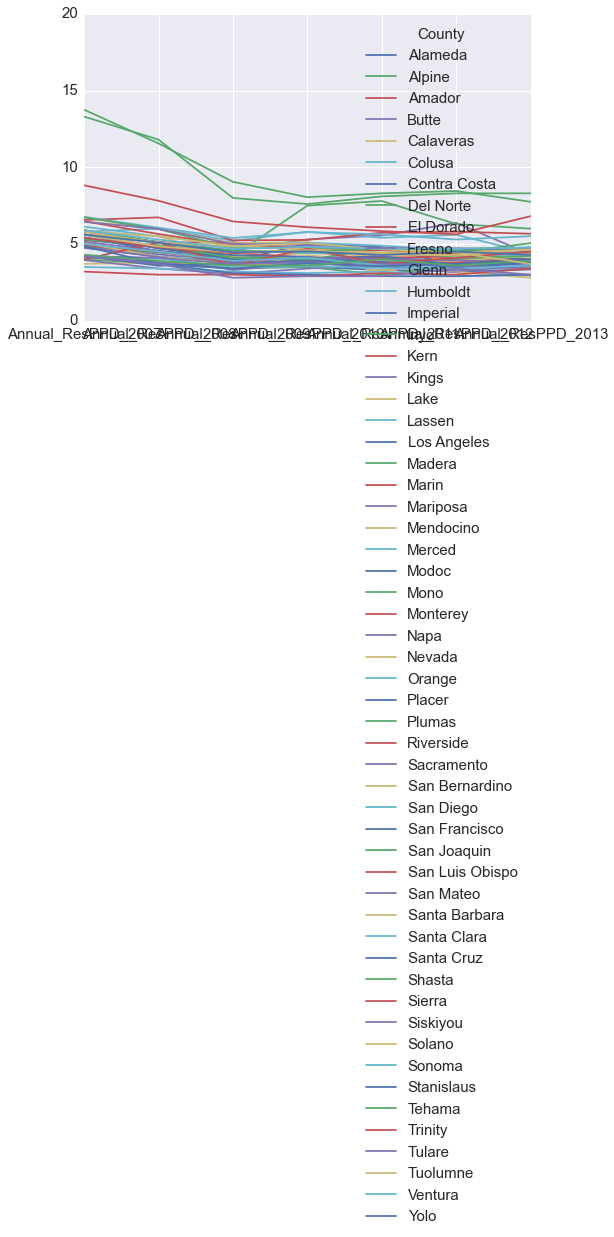

In [24]:
res_ppd_by_county.plot()
plt.ylim(0,20)
plt.rcParams['figure.figsize'] = (15, 15)

In [25]:
resppd_df = pd.DataFrame(join3_df[['Annual_ResPPD_2007','Annual_ResPPD_2008','Annual_ResPPD_2009',
                                  'Annual_ResPPD_2010','Annual_ResPPD_2011','Annual_ResPPD_2012','Annual_ResPPD_2013']])
resppd_df = resppd_df.dropna().T
resppd_df

0    1    2    3    4    5    6     7    8    9   ...   \
Annual_ResPPD_2007  4.8  6.6  3.8  3.9  2.9  3.3  2.5  13.3  7.3  5.9 ...    
Annual_ResPPD_2008  3.8  5.7  3.6  3.6  2.3  3.2  2.2  11.8  6.5  5.1 ...    
Annual_ResPPD_2009  3.2  5.0  3.2  4.0  2.2  2.7  2.1   8.0  5.5  5.1 ...    
Annual_ResPPD_2010  2.8  5.8  2.8  3.2  1.7  2.7  2.1   7.6  5.7  4.6 ...    
Annual_ResPPD_2011  3.0  5.7  3.0  2.3  2.1  2.7  2.1   8.1  5.9  4.4 ...    
Annual_ResPPD_2012  3.0  5.8  2.7  2.7  1.6  2.3  1.9   8.3  5.1  4.1 ...    
Annual_ResPPD_2013  3.2  5.5  2.6  2.7  1.9  2.4  2.1   8.3  5.3  4.3 ...    

                    405  406  407  408  409  410  411  412  413  414  
Annual_ResPPD_2007  6.3  4.5  4.2  6.4  6.7  5.6  5.7  4.9  4.3  5.7  
Annual_ResPPD_2008  5.5  3.9  3.7  5.9  6.0  5.0  5.4  4.5  3.4  4.7  
Annual_ResPPD_2009  4.2  3.7  2.8  4.9  5.5  4.8  5.2  4.1  2.8  4.5  
Annual_ResPPD_2010  6.0  4.1  2.9  4.7  4.0  4.9  4.5  4.2  2.7  4.4  
Annual_ResPPD_2011  4.7  4.2  2.9  4.3  3.9  5.1  4.4  4.2  2.8  4.6  
Annual_ResPPD_2012  4.9  3.8  3.4  4.1  4.8  6.9  3.1  4.1  2.7  4.1  
Annual_ResPPD_2013  5.1  3.9  3.0  4.7  5.6  4.9  3.9  4.2  2.9  4.4  

[7 rows x 403 columns]

In [26]:
empppd_df = pd.DataFrame(join3_df[['Annual_EmpPPD_2007','Annual_EmpPPD_2008','Annual_EmpPPD_2009',
                                  'Annual_EmpPPD_2010','Annual_EmpPPD_2011','Annual_EmpPPD_2012','Annual_EmpPPD_2013']])
empppd_df = empppd_df.dropna().T
empppd_df

0     1     2     3     4     5    6     7     8     9    \
Annual_EmpPPD_2007  31.7  13.1  13.8  16.0  11.0  11.9  6.7  22.0  15.3  17.4   
Annual_EmpPPD_2008  25.3  10.9  12.4  14.9   8.2  11.4  6.2  19.6  12.6  15.1   
Annual_EmpPPD_2009  24.6  10.0  11.6  16.9   8.7  10.1  6.0  15.9  10.3  15.7   
Annual_EmpPPD_2010  28.1  11.5  10.2  18.2   7.8  10.4  6.7  16.4  12.2  16.1   
Annual_EmpPPD_2011  28.7  10.8  10.1   9.9   9.7   9.9  6.0  14.0  11.9  14.0   
Annual_EmpPPD_2012  27.2  10.4   8.9  11.5   6.9   8.4  5.7  13.8   9.8  13.4   
Annual_EmpPPD_2013  22.0   9.9   8.2  13.5   8.4   8.6  5.6  19.5   8.7  13.9   

                    ...    405   406   407   408   409  410   411   412   413  \
Annual_EmpPPD_2007  ...   11.9  18.0  21.9  16.4  19.1  4.0  24.2  17.5  30.0   
Annual_EmpPPD_2008  ...   10.6  15.6  19.5  15.3  17.0  3.6  23.6  16.6  23.6   
Annual_EmpPPD_2009  ...    8.8  18.1  16.8  13.5  16.0  3.4  25.7  16.4  20.6   
Annual_EmpPPD_2010  ...   13.6  20.5  15.0  14.0  13.5  4.7  24.2  19.2  22.4   
Annual_EmpPPD_2011  ...    9.7  17.6  12.6  12.0  11.1  4.5  22.7  17.0  20.9   
Annual_EmpPPD_2012  ...   10.2  16.4  18.8  11.5  13.2  6.2  16.7  16.3  21.6   
Annual_EmpPPD_2013  ...    9.3  15.9  17.9  12.8  16.5  4.3  21.4  16.6  24.1   

                     414  
Annual_EmpPPD_2007  24.5  
Annual_EmpPPD_2008  20.5  
Annual_EmpPPD_2009  21.0  
Annual_EmpPPD_2010  22.0  
Annual_EmpPPD_2011  22.5  
Annual_EmpPPD_2012  21.2  
Annual_EmpPPD_2013  22.6  

[7 rows x 403 columns]

(0, 100)

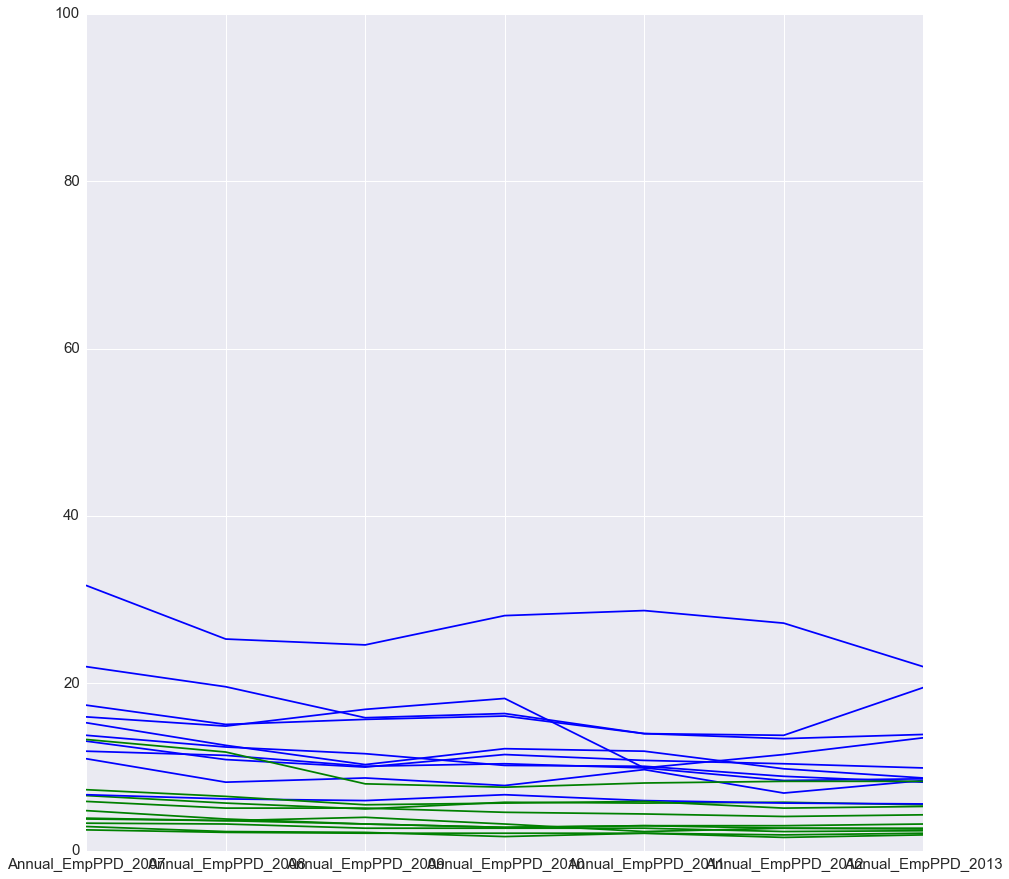

In [27]:
for col in resppd_df.columns[:10]:
    resppd_df[col].plot(color='g')
    empppd_df[col].plot(color='b')
plt.ylim(0,100)

Drop diversion rate except 2010

In [28]:
for col in join3_df.columns[2:17]:
    join3_df.pop(col)
    
for col in join3_df.columns[7:22]:
    join3_df.pop(col)

Remove nan rows (need to re-consider this with other fellows)
For now, I just disregarded them.

In [29]:
df = join3_df.dropna()
# df=df.reset_index()

In [30]:
df.head(5)

County  Jurisdiction  Num_RecyclingProg_2010  Target_ResPPD_2010  \
0  San Bernardino      Adelanto                      44                 6.9   
1     Los Angeles  Agoura Hills                      32                 7.0   
2         Alameda       Alameda                      45                 5.5   
4         Alameda        Albany                      43                 5.0   
5     Los Angeles      Alhambra                      34                 3.8   

   Annual_ResPPD_2010  Target_EmpPPD_2010  Annual_EmpPPD_2010  Population  \
0                 2.8                40.6                28.1       31765   
1                 5.8                15.2                11.5       20330   
2                 2.8                21.4                10.2       73812   
4                 1.7                19.3                 7.8       18539   
5                 2.7                14.4                10.4       83089   

    Male  Female         ...           Eligible  Registered  Democratic  \
0  16318   15447         ...            1277263      852388      324116   
1  10021   10309         ...            6110775     4908952     2471645   
2  35315   38497         ...            1041505      807397      445946   
4   8821    9718         ...            1041505      807397      445946   
5  39328   43761         ...            6110775     4908952     2471645   

   Republican  American Independent  Green  Libertarian  Peace and Freedom  \
0      293229                 31176   3148         5523               4030   
1     1005299                111963  25108        28457              35914   
2      107853                 16613  10041         4228               2942   
4      107853                 16613  10041         4228               2942   
5     1005299                111963  25108        28457              35914   

   Other  No Party Preference  
0   2108               189058  
1  45347              1185219  
2  43669               176105  
4  43669               176105  
5  45347              1185219  

[5 rows x 89 columns]

In [31]:
df.describe()

Num_RecyclingProg_2010  Target_ResPPD_2010  Annual_ResPPD_2010  \
count              326.000000          326.000000          326.000000   
mean                38.377301           46.241718           24.678528   
std                  5.537729          614.222346          299.156719   
min                 15.000000            2.100000            1.100000   
25%                 35.000000            5.200000            3.500000   
50%                 39.000000            6.500000            4.300000   
75%                 42.000000            8.475000            5.300000   
max                 51.000000        11024.200000         5303.300000   

       Target_EmpPPD_2010  Annual_EmpPPD_2010      Population          Male  \
count          326.000000          326.000000      326.000000     326.00000   
mean            24.909202           17.365337    70454.009202   34876.00000   
std             28.312046           12.252799   118793.301890   59447.34293   
min              6.100000            2.600000      112.000000      55.00000   
25%             14.400000           10.625000    15694.750000    7651.25000   
50%             19.400000           14.350000    39533.500000   19319.00000   
75%             28.000000           20.775000    82433.500000   40163.25000   
max            421.300000          108.900000  1307402.000000  660626.00000   

              Female  MedianAgeYears  MaleMedianAgeYears         ...           \
count     326.000000      326.000000          326.000000         ...            
mean    35578.009202       36.608896           35.487117         ...            
std     59375.730641        7.000977            6.929079         ...            
min        57.000000       23.500000           22.900000         ...            
25%      7843.250000       31.900000           30.925000         ...            
50%     19843.500000       36.000000           34.800000         ...            
75%     41769.500000       40.375000           39.075000         ...            
max    646776.000000       77.000000           76.400000         ...            

             Eligible      Registered      Democratic      Republican  \
count      326.000000      326.000000      326.000000      326.000000   
mean   2048093.625767  1569573.607362   724361.555215   390517.322086   
std    2191556.203582  1784244.995490   918000.580323   360686.044780   
min       6891.000000     5119.000000     1247.000000     2536.000000   
25%     501795.000000   353968.000000   164881.000000   107853.000000   
50%    1277263.000000   852388.000000   324116.000000   293229.000000   
75%    2144036.000000  1549814.000000   535626.000000   575329.000000   
max    6110775.000000  4908952.000000  2471645.000000  1005299.000000   

       American Independent         Green   Libertarian  Peace and Freedom  \
count            326.000000    326.000000    326.000000         326.000000   
mean           39036.414110   8010.052147   9906.604294        9293.981595   
std            40115.866695   9149.822467  10291.719409       13882.407324   
min              261.000000     26.000000     44.000000          11.000000   
25%            10804.000000   1563.500000   2204.000000         961.000000   
50%            27637.000000   3252.000000   5523.000000        3154.000000   
75%            53330.000000   9495.750000  13066.000000        4285.000000   
max           111963.000000  25108.000000  28457.000000       35914.000000   

              Other  No Party Preference  
count    326.000000           326.000000  
mean   13624.208589        374823.469325  
std    18389.292079        434045.802344  
min        5.000000           987.000000  
25%     1380.000000         76347.000000  
50%     5096.000000        176463.000000  
75%    34570.000000        424845.000000  
max    45347.000000       1185219.000000  

[8 rows x 87 columns]

Check which specific row has lots of maximum values in dataframe

In [32]:
# df.index[df['Target_ResPPD_2010'].max()]
index_list = np.array([])
for col in df.columns[2:]:
#     print col, df[df[col] == df[col].max()].index.tolist()
    index_list = np.append(index_list, df[df[col] == df[col].max()].index.tolist())

cl.Counter(index_list).most_common(20)

[(311.0, 42),
 (390.0, 12),
 (36.0, 11),
 (195.0, 11),
 (1.0, 10),
 (5.0, 10),
 (14.0, 10),
 (19.0, 10),
 (21.0, 10),
 (23.0, 10),
 (27.0, 10),
 (28.0, 10),
 (29.0, 10),
 (42.0, 10),
 (45.0, 10),
 (56.0, 10),
 (58.0, 10),
 (64.0, 10),
 (74.0, 10),
 (75.0, 10)]

In [54]:
df.loc[311]

KeyError: 'the label [311] is not in the [index]'

In [33]:
# df[df['index']==311]
# df[df['index']==390]
# df[df['index']==36]
# df[df['index']==195]
# df[df['index']==1]
# df[df['index']==5]
# df[df['index']==14]
# df[df['index']==19]
# df[df['index']==21]
# df[df['index']==23]
# df[df['index']==27]
# df[df['index']==28]
# df[df['index']==29]
# df[df['index']==42]
# df[df['index']==45]
# df[df['index']==56]
# df[df['index']==58]
# df[df['index']==64]
# df[df['index']==74]
# df[df['index']==75]

Some of maximum values from columns are too high. So, I considered them as outliers to do analysis

In [34]:
# Only care about 95% of data
df = df[df['Target_ResPPD_2010'] < df['Target_ResPPD_2010'].quantile(.9)]#Population
df = df[df['Other'] < df['Other'].quantile(.75)]
df.describe()

Num_RecyclingProg_2010  Target_ResPPD_2010  Annual_ResPPD_2010  \
count              206.000000          206.000000          206.000000   
mean                39.441748            6.366019            4.313592   
std                  5.086952            1.972472            1.316392   
min                 26.000000            2.100000            1.100000   
25%                 36.000000            5.000000            3.400000   
50%                 40.000000            6.200000            4.100000   
75%                 43.000000            7.700000            5.000000   
max                 51.000000           11.400000            9.200000   

       Target_EmpPPD_2010  Annual_EmpPPD_2010      Population           Male  \
count          206.000000          206.000000      206.000000     206.000000   
mean            21.661165           16.342718    75971.165049   37756.713592   
std             14.723674            9.108244   139014.133663   69785.124170   
min              6.300000            2.600000      367.000000     182.000000   
25%             13.325000           10.300000    15313.750000    7500.250000   
50%             17.400000           14.000000    38767.500000   19098.500000   
75%             25.900000           20.350000    83206.250000   40815.250000   
max            119.400000           55.200000  1307402.000000  660626.000000   

              Female  MedianAgeYears  MaleMedianAgeYears         ...           \
count     206.000000      206.000000          206.000000         ...            
mean    38214.451456       36.010194           34.868932         ...            
std     69256.273819        6.643636            6.423494         ...            
min       185.000000       23.500000           22.900000         ...            
25%      7639.000000       32.075000           31.150000         ...            
50%     19518.500000       35.600000           34.550000         ...            
75%     42571.750000       39.875000           38.350000         ...            
max    646776.000000       77.000000           76.400000         ...            

             Eligible      Registered     Democratic     Republican  \
count      206.000000      206.000000     206.000000     206.000000   
mean    896458.165049   635764.980583  236060.830097  216180.179612   
std     707267.978161   507012.952112  165651.148270  197527.185135   
min       6891.000000     5119.000000    1247.000000    2536.000000   
25%     281936.000000   200570.000000   83077.000000   56185.000000   
50%     573870.000000   430432.000000  179167.000000  149963.500000   
75%    1277263.000000   852388.000000  356431.000000  293229.000000   
max    2144036.000000  1549814.000000  535626.000000  575329.000000   

       American Independent        Green   Libertarian  Peace and Freedom  \
count            206.000000   206.000000    206.000000         206.000000   
mean           18530.242718  3086.092233   4827.665049        1987.111650   
std            15797.657487  2132.277934   4370.102242        1624.995175   
min              261.000000    26.000000     44.000000          11.000000   
25%             5056.000000  1451.000000   1461.000000         515.750000   
50%            11186.000000  2749.500000   3114.000000        1129.000000   
75%            31176.000000  4271.000000   5523.000000        3613.000000   
max            53330.000000  7860.000000  13066.000000        5313.000000   

             Other  No Party Preference  
count   206.000000           206.000000  
mean   2527.053398        152565.805825  
std    2114.199110        129210.949922  
min       5.000000           987.000000  
25%     750.000000         46520.000000  
50%    1502.000000         95241.000000  
75%    5096.000000        243780.000000  
max    6054.000000        424845.000000  

[8 rows x 87 columns]

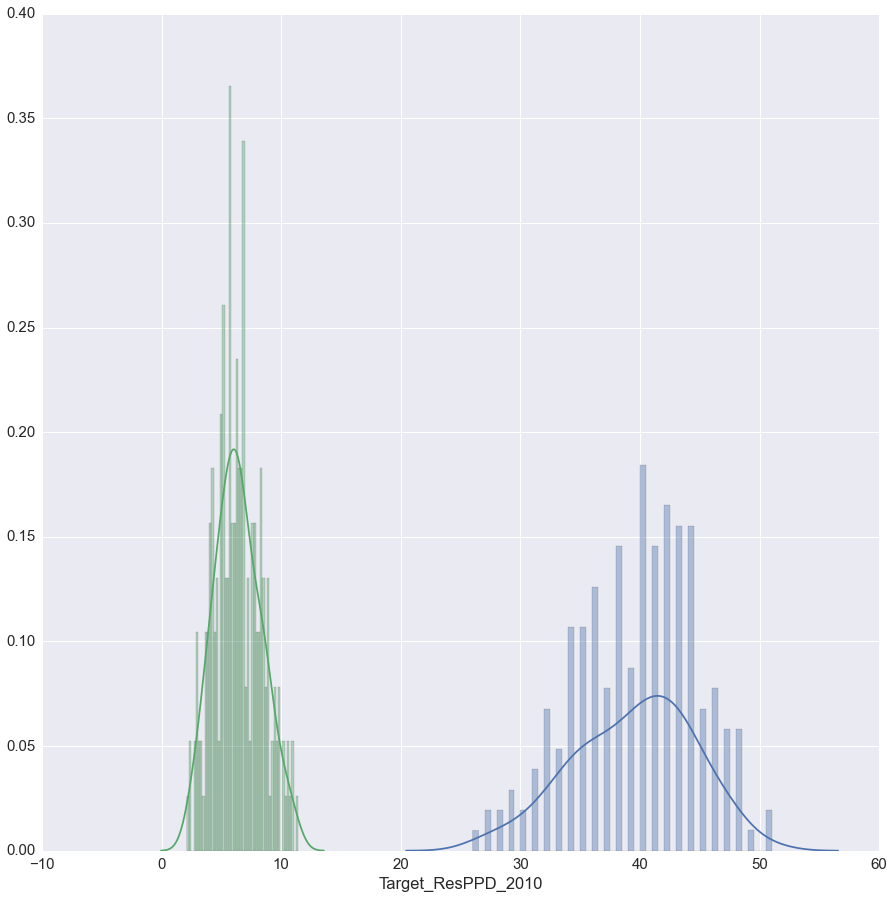

In [35]:
# Plot distribution of each column's value
for col in df.columns[2:4]:
#     print col
    g = sns.distplot(df[col], bins=50)
#     g.set_size_inches((10,1))
#     plt.figure(figsize=(15, 10))
#     print col
# sns.distplot(df['Population'], bins=50)
# sns.distplot(df['Male'], bins=50)
# sns.distplot(df['Female'], bins=50)

In [36]:
target_col_list = ['Annual_ResPPD_2010', 'Annual_EmpPPD_2010']#df.columns.values[3:7]
other_col_list = np.delete(df.columns.values, range(0,7), None)
other_col_list = np.insert(other_col_list, 0, 'Num_RecyclingProg_2010')
other_col_list

array(['Num_RecyclingProg_2010', 'Population', u'Male', u'Female',
       u'MedianAgeYears', u'MaleMedianAgeYears', u'FemaleMedianAgeYears',
       u'AverageHouseholdSize', u'AverageFamilySize',
       u'PersonsUnder5Years', u'PersonsUnder18Years', u'PersonsAge21Plus',
       u'PersonsAge55Plus', u'PersonsAge60Plus', u'PersonsAge65Plus',
       u'PercentPopulationFemale', u'PercentPopulationLessThan18',
       u'PopulationR', u'TotalPopulationOfOneRace', u'White',
       u'BlackOrAfricanAmerican', u'AmericanIndianAndAlaskaNative',
       u'TotalAsian', u'AsianIndian', u'Chinese', u'Filipino', u'Japanese',
       u'Korean', u'Vietnamese', u'OtherAsian', u'TotalNHOPI',
       u'NativeHawaiian', u'GuamanianOrChamorro', u'Samoan',
       u'OtherPacificIslander', u'SomeOtherRace',
       u'TotalPopulationInHouseholds', u'Householder', u'Spouse',
       u'Children', u'ChildrenOwnChildUnder18y', u'OtherRelatives',
       u'OtherRelativesUnder18y', u'NonRelatives',
       u'NonRelativesUnmarri

In [37]:
# for col1, col2 in it.combinations(df.columns.values[2:], 2):
# #     print col1, col2
#     corr = df[col1].corr(df[col2])
#     if abs(corr) > 0.99:
#         print col1, col2, corr
# #         high_corr_pairs.append((col1, col2, corr))

# # print "List of column pairs considering high correlation value"
# # high_corr_pairs

Compute correlation value from set of columns

In [38]:
corr__belowOne_pairs = []
corr__belowTwo_pairs = []
corr__belowThree_pairs = []
corr__belowFour_pairs = []
for col1, col2 in [(col1, col2) for col1 in target_col_list for col2 in other_col_list]:
    corr = df[col1].corr(df[col2])
    if abs(corr) >= 0.1 and abs(corr) < 0.2:
#         print col1, col2, corr
        corr__belowTwo_pairs.append((col1, col2, corr))
    elif abs(corr) >= 0.2 and abs(corr) < 0.3:
        corr__belowThree_pairs.append((col1, col2, corr))
    elif abs(corr) >= 0.3:
        corr__belowFour_pairs.append((col1, col2, corr))
    else:
        corr__belowOne_pairs.append((col1, col2, corr))

In [39]:
print "List of column pairs - corr value < 0.1"
corr__belowOne_pairs

List of column pairs - corr value < 0.1


[('Annual_ResPPD_2010', 'Num_RecyclingProg_2010', -0.059614577306432222),
 ('Annual_ResPPD_2010', 'Population', 0.023245917197457083),
 ('Annual_ResPPD_2010', u'Male', 0.022551054826322633),
 ('Annual_ResPPD_2010', u'Female', 0.023936934342111835),
 ('Annual_ResPPD_2010', u'PersonsUnder5Years', 0.022593367747922127),
 ('Annual_ResPPD_2010', u'PersonsUnder18Years', 0.021275273532967442),
 ('Annual_ResPPD_2010', u'PersonsAge21Plus', 0.022351429906518869),
 ('Annual_ResPPD_2010', u'PersonsAge55Plus', 0.023093978271611901),
 ('Annual_ResPPD_2010', u'PersonsAge60Plus', 0.022645986650757056),
 ('Annual_ResPPD_2010', u'PersonsAge65Plus', 0.021888586466643708),
 ('Annual_ResPPD_2010', u'PercentPopulationFemale', 0.080601253734338948),
 ('Annual_ResPPD_2010', u'PopulationR', 0.023245917197457083),
 ('Annual_ResPPD_2010', u'TotalPopulationOfOneRace', 0.023577829299187614),
 ('Annual_ResPPD_2010', u'White', 0.049307298924285606),
 ('Annual_ResPPD_2010', u'BlackOrAfricanAmerican', -0.0139650422058

In [40]:
print "List of column pairs - 0.1 <= corr value < 0.2"
corr__belowTwo_pairs

List of column pairs - 0.1 <= corr value < 0.2


[('Annual_ResPPD_2010', u'MedianAgeYears', 0.15957880512644171),
 ('Annual_ResPPD_2010', u'MaleMedianAgeYears', 0.13425106107767637),
 ('Annual_ResPPD_2010', u'FemaleMedianAgeYears', 0.190011265145236),
 ('Annual_ResPPD_2010', u'Percent_single_parent', 0.16048715285893053),
 ('Annual_ResPPD_2010', u'Seasonal_units', 0.15598785339024254),
 ('Annual_ResPPD_2010', u'VancancyRate', 0.18558664088055915),
 ('Annual_ResPPD_2010', 'MedianAge', 0.16470430906877795),
 ('Annual_ResPPD_2010', 'Eligible', 0.14968989247854481),
 ('Annual_ResPPD_2010', 'Registered', 0.15563168549942288),
 ('Annual_ResPPD_2010', 'Democratic', 0.11282579014913537),
 ('Annual_ResPPD_2010', 'Republican', 0.18158446716315788),
 ('Annual_ResPPD_2010', 'American Independent', 0.16354726187292934),
 ('Annual_ResPPD_2010', 'Green', 0.14402860686491625),
 ('Annual_ResPPD_2010', 'Libertarian', 0.19440421189803631),
 ('Annual_ResPPD_2010', 'Other', 0.12278234347464993),
 ('Annual_ResPPD_2010', 'No Party Preference', 0.1563086140

In [41]:
print "List of column pairs - 0.2 <= corr value < 0.3"
corr__belowThree_pairs

List of column pairs - 0.2 <= corr value < 0.3


[('Annual_ResPPD_2010', u'AverageHouseholdSize', -0.28771621845515949),
 ('Annual_ResPPD_2010', u'AverageFamilySize', -0.25758384858490596),
 ('Annual_ResPPD_2010', u'PercentPopulationLessThan18', -0.23845475708224331),
 ('Annual_EmpPPD_2010', u'MedianAgeYears', -0.21809228259063293),
 ('Annual_EmpPPD_2010', u'FemaleMedianAgeYears', -0.24044078853582665),
 ('Annual_EmpPPD_2010', u'PersonsAge55Plus', -0.20197080875800127),
 ('Annual_EmpPPD_2010', u'PersonsAge60Plus', -0.20382198124955073),
 ('Annual_EmpPPD_2010', u'PersonsAge65Plus', -0.2058116408222791),
 ('Annual_EmpPPD_2010', u'AsianIndian', -0.22125014254507858),
 ('Annual_EmpPPD_2010', u'Japanese', -0.23476730054523115),
 ('Annual_EmpPPD_2010', u'HH_livingalone', -0.20006283107491843),
 ('Annual_EmpPPD_2010', u'HH_seniorover65', -0.21517214580303179),
 ('Annual_EmpPPD_2010', u'HomeownerVacancyRate', 0.24720792596308838),
 ('Annual_EmpPPD_2010', u'RentalVacancyRate', 0.2122030178468941),
 ('Annual_EmpPPD_2010', 'MedianAge', -0.24786

In [42]:
print "List of column pairs - corr value >= 0.3"
corr__belowFour_pairs

List of column pairs - corr value >= 0.3


[('Annual_EmpPPD_2010', u'AverageHouseholdSize', 0.34753046595311843),
 ('Annual_EmpPPD_2010', u'AverageFamilySize', 0.32466841281145797),
 ('Annual_EmpPPD_2010', u'PercentPopulationLessThan18', 0.31905792366782587)]

C:\Users\SangSeo\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


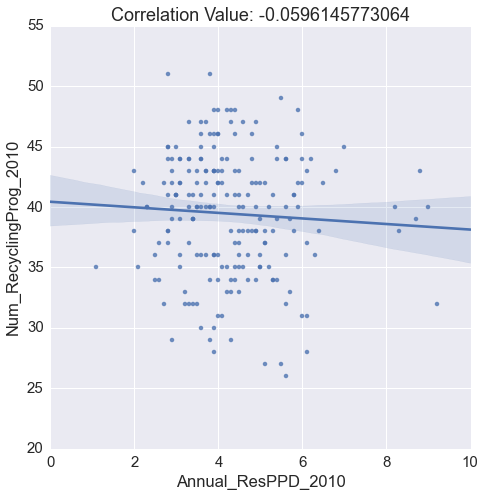

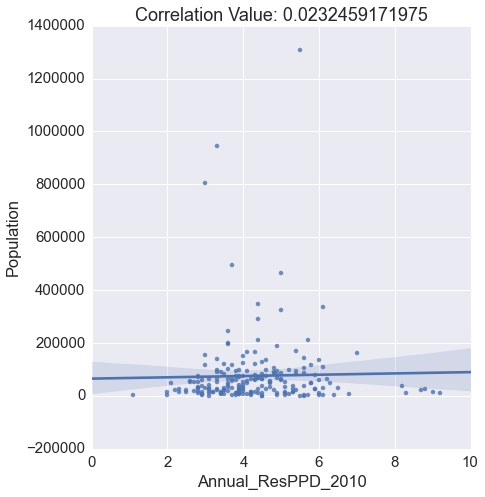

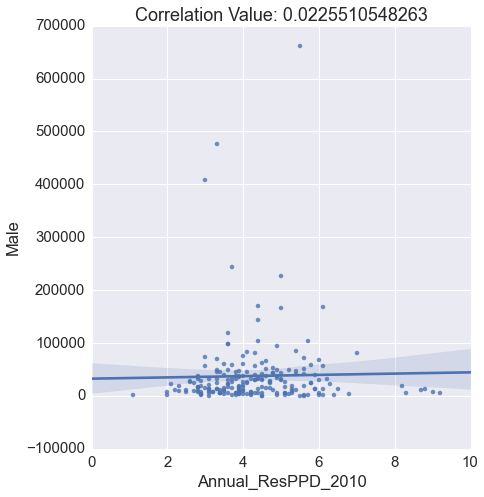

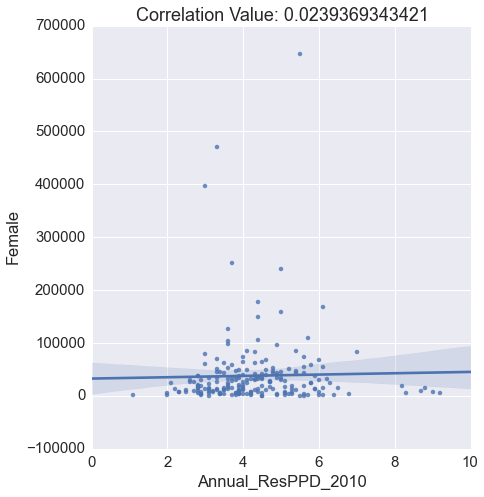

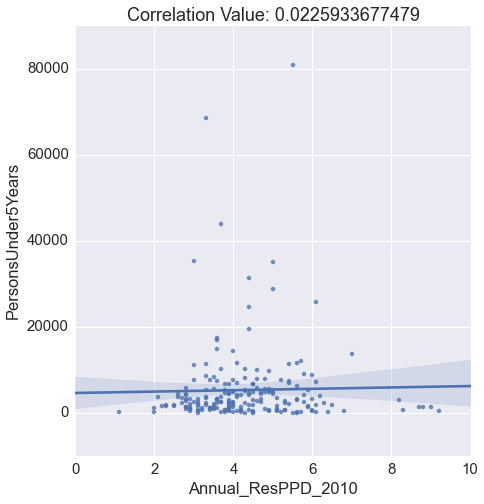

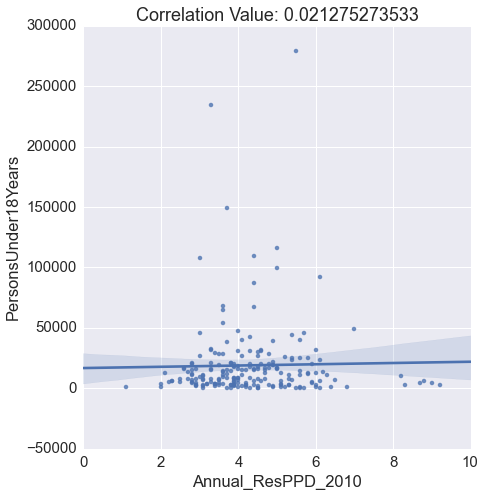

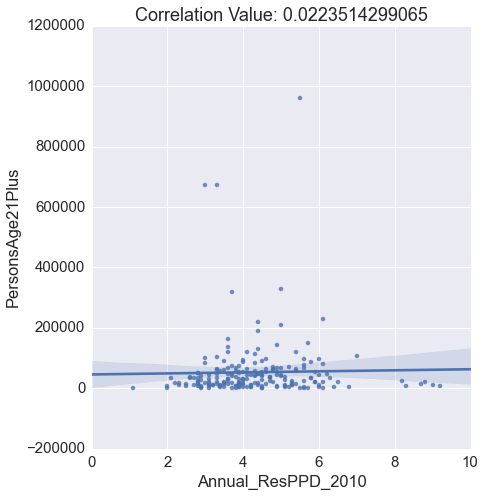

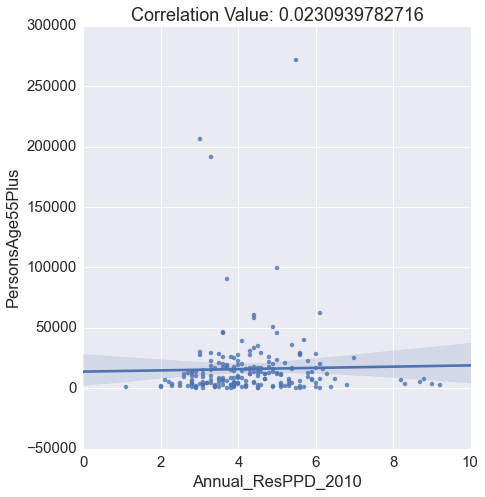

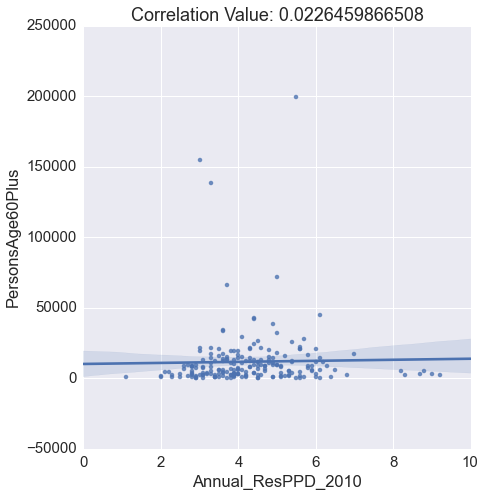

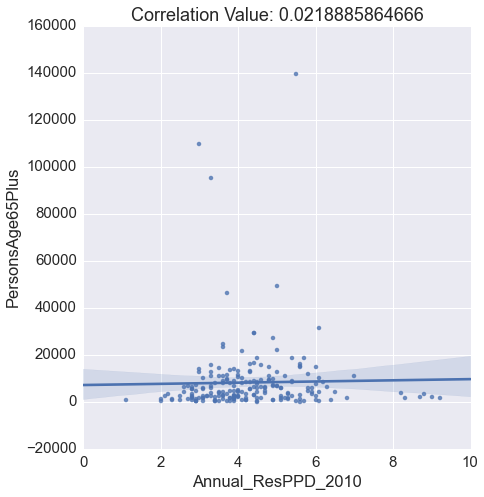

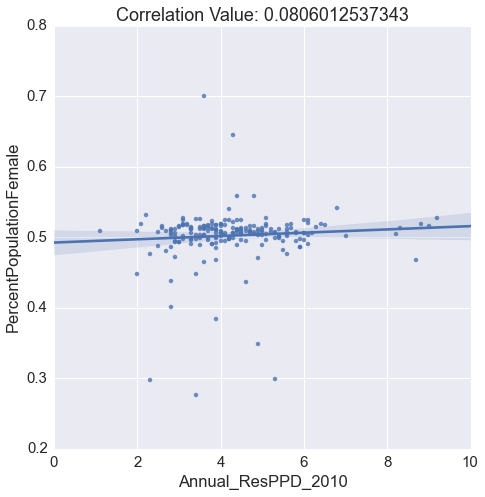

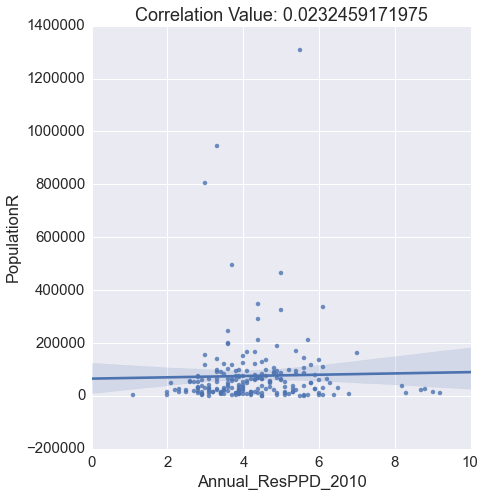

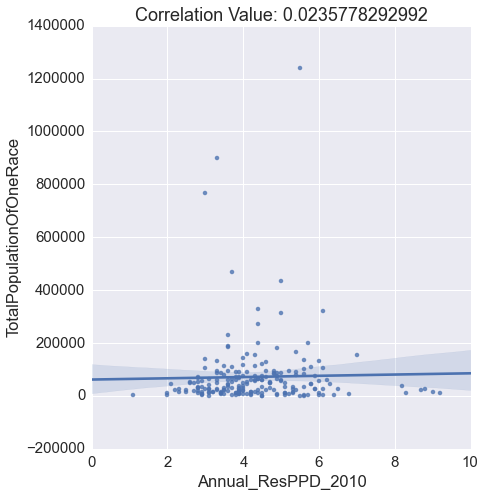

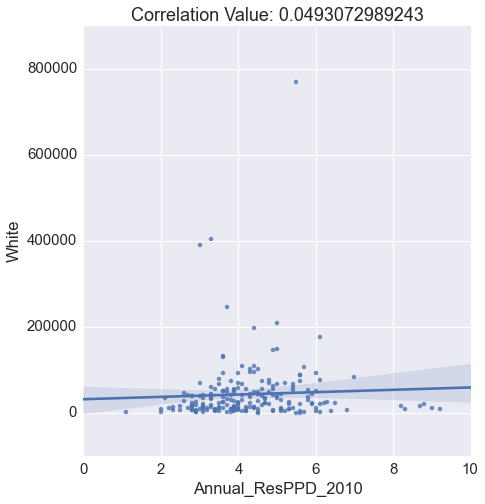

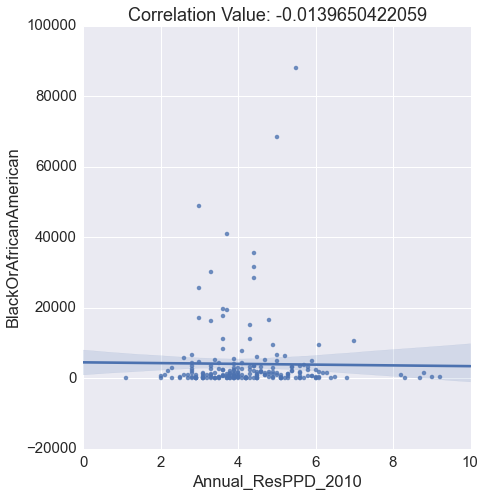

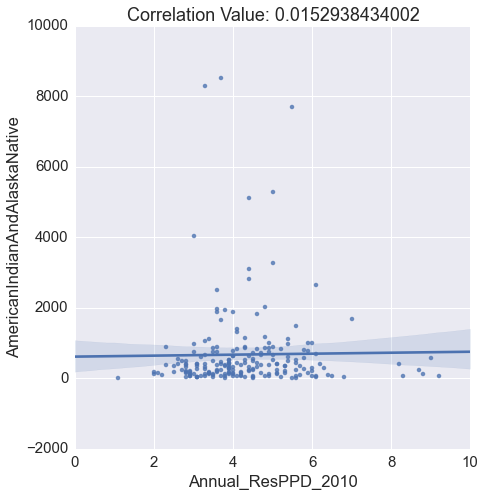

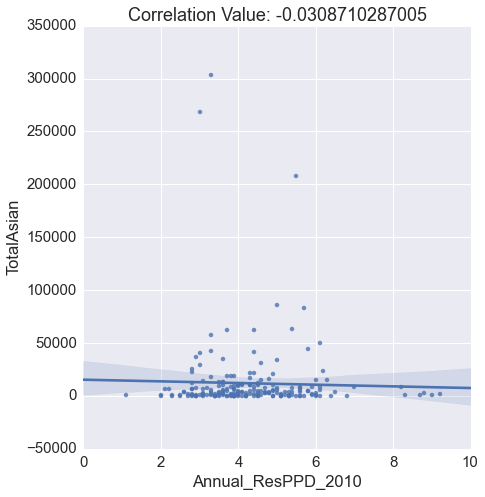

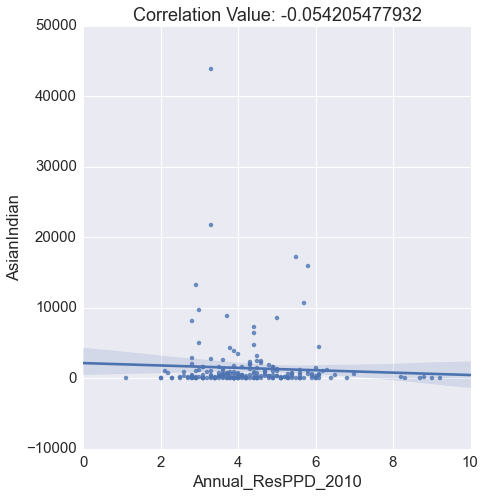

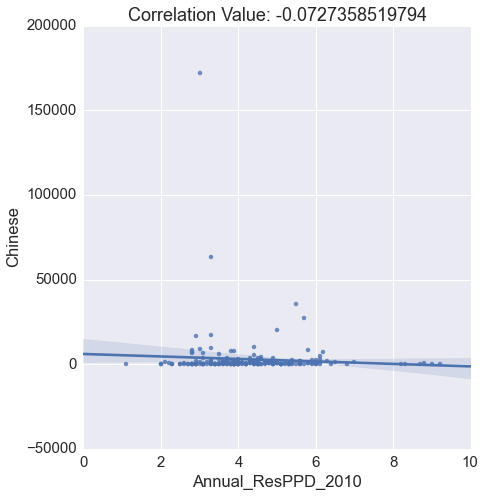

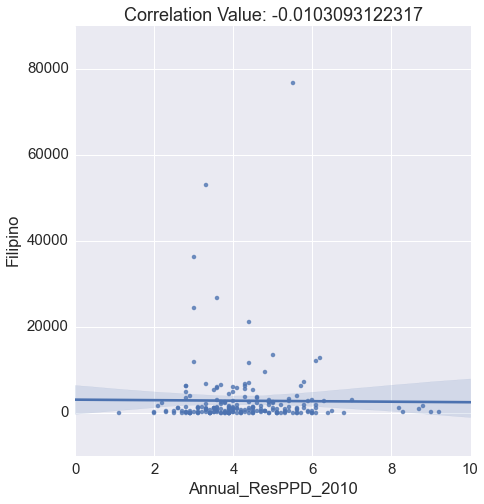

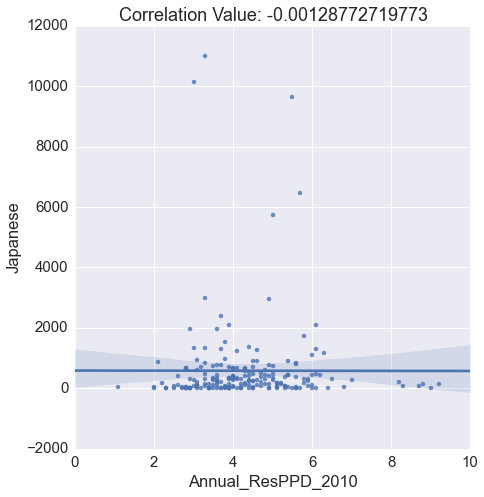

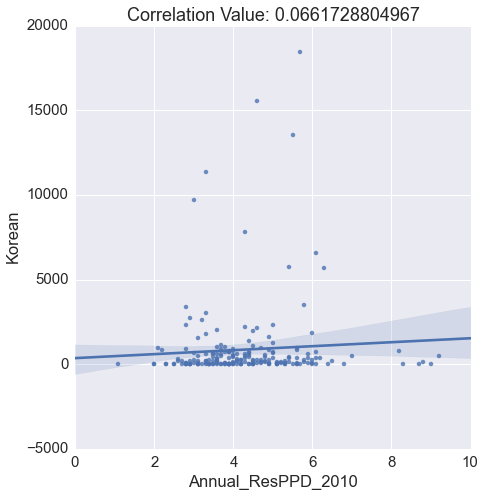

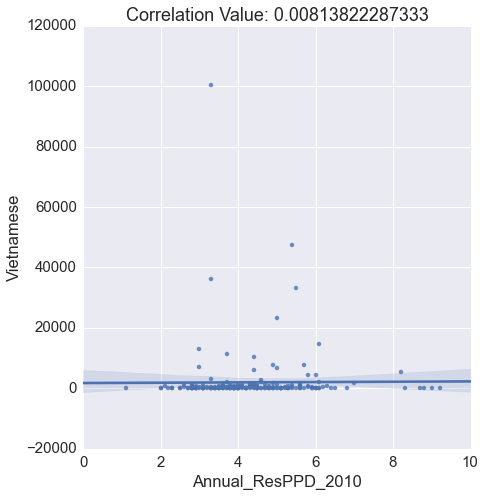

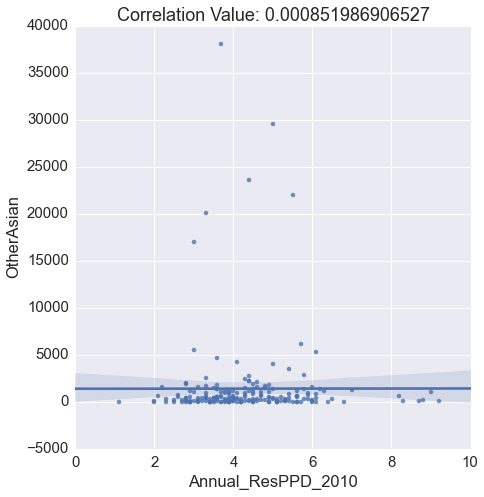

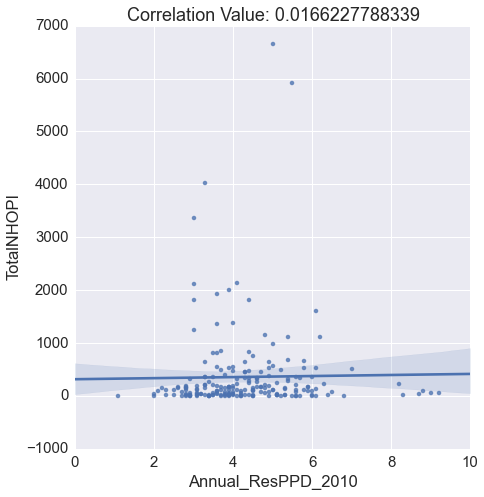

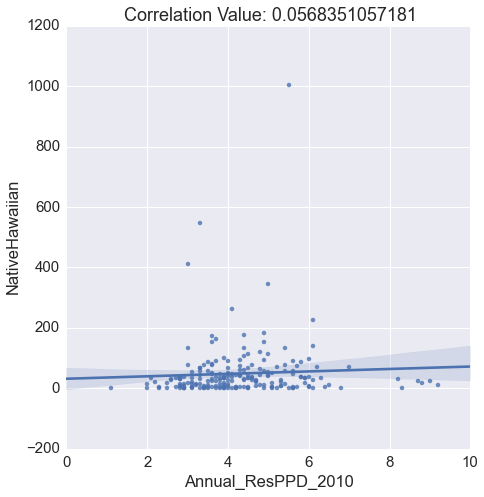

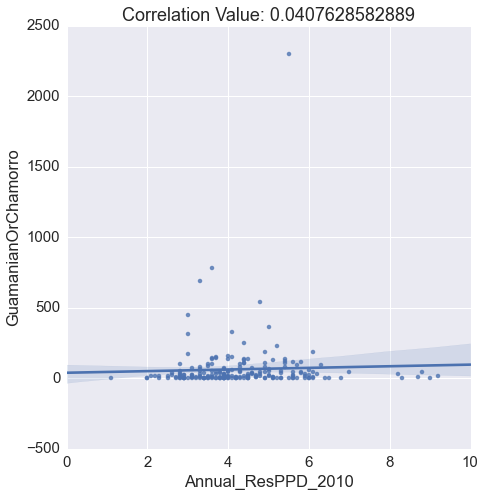

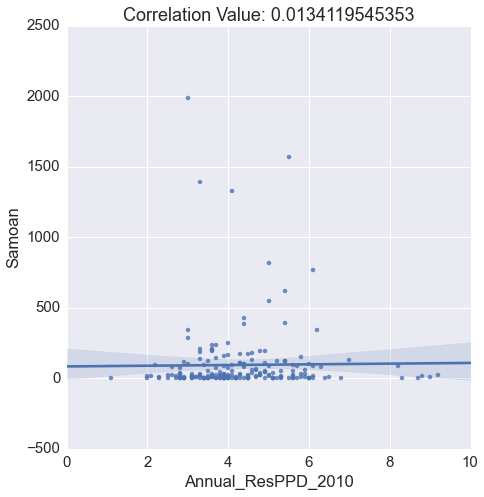

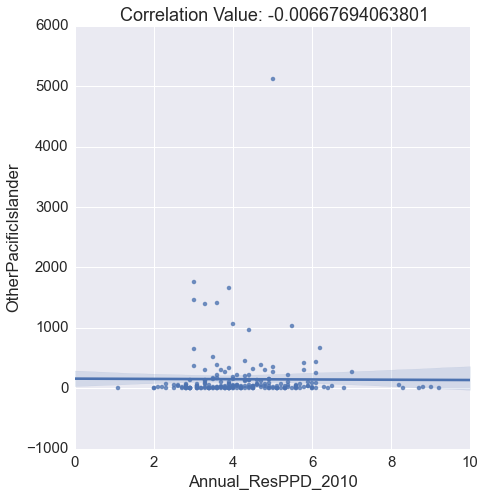

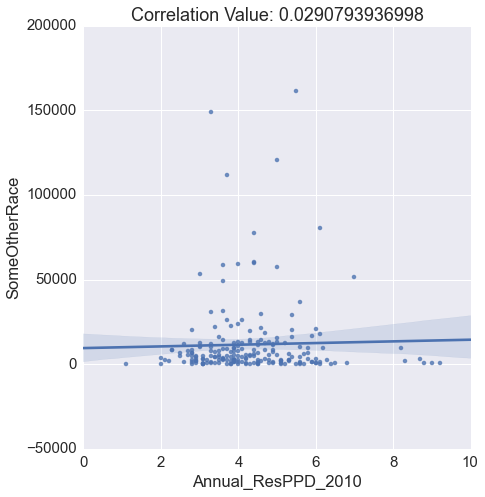

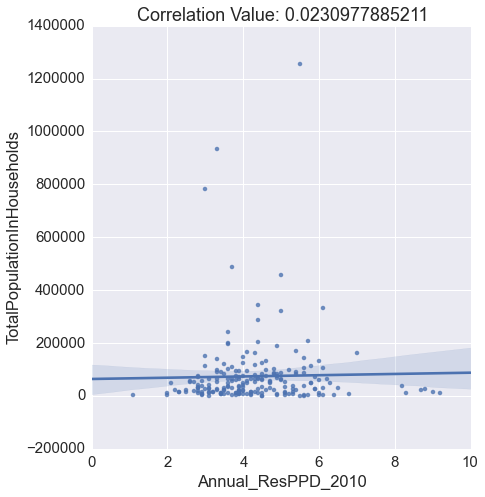

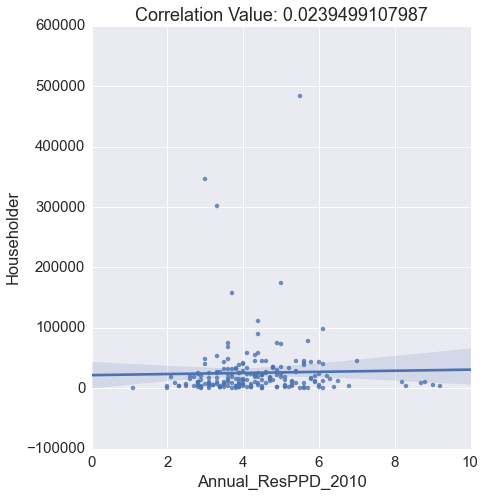

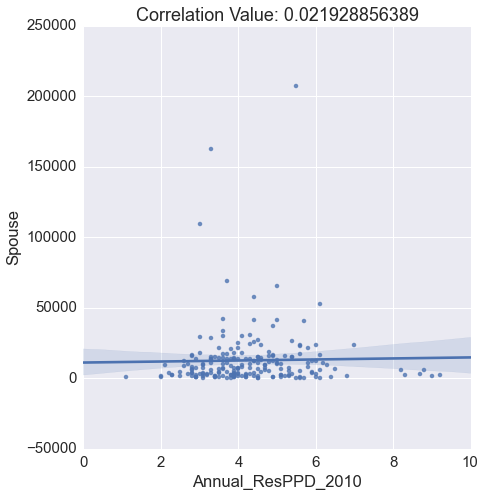

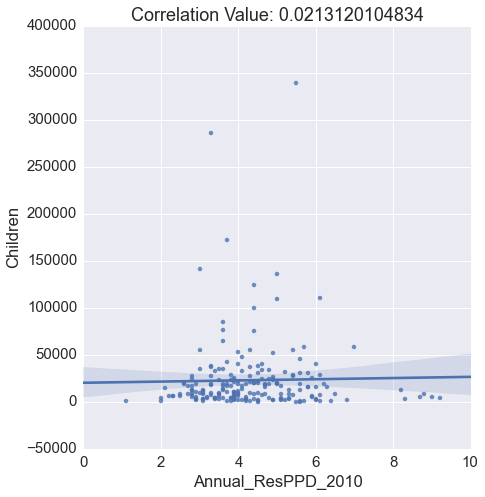

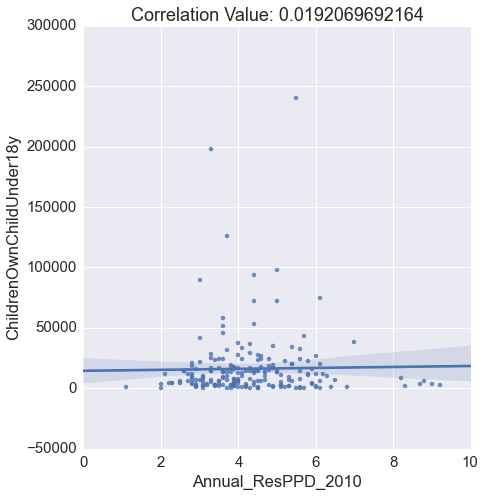

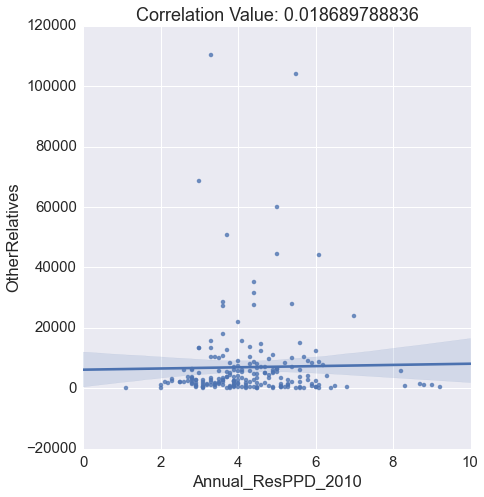

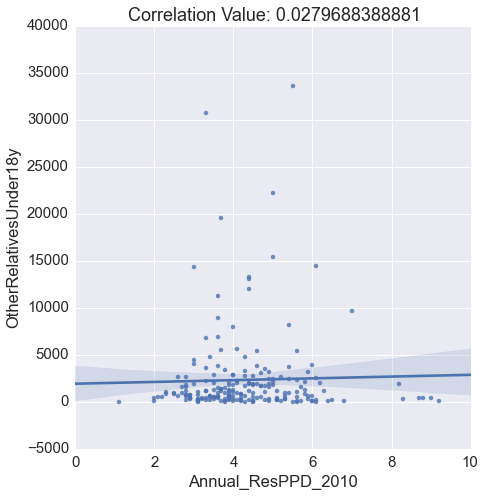

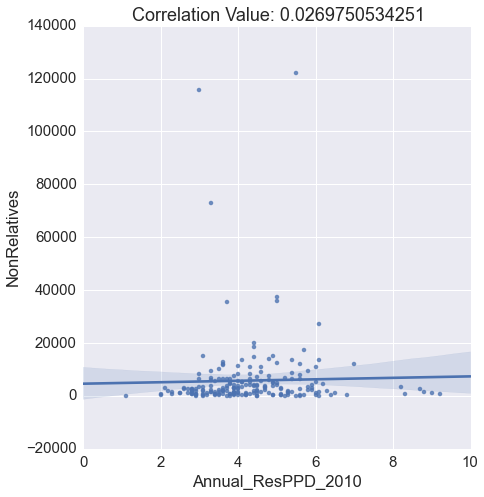

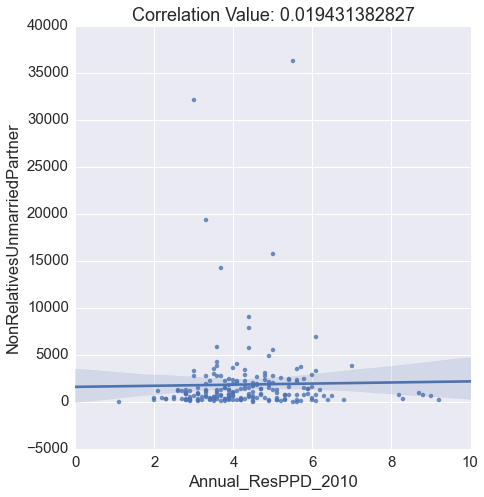

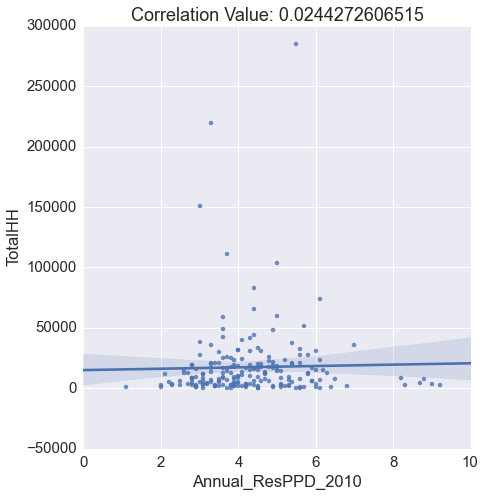

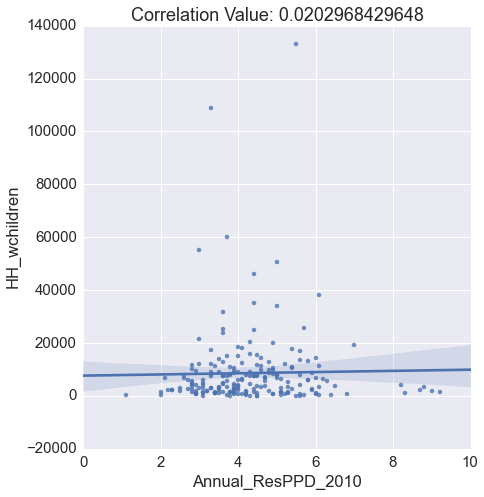

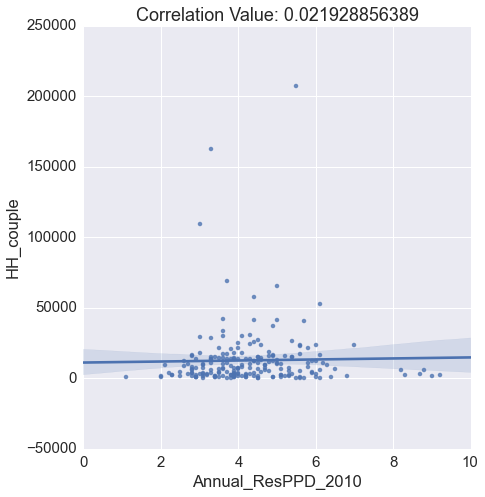

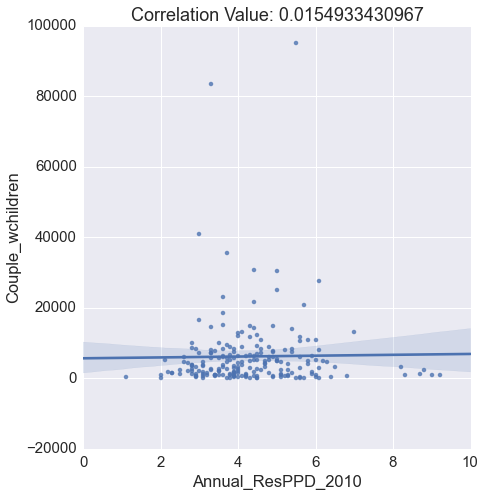

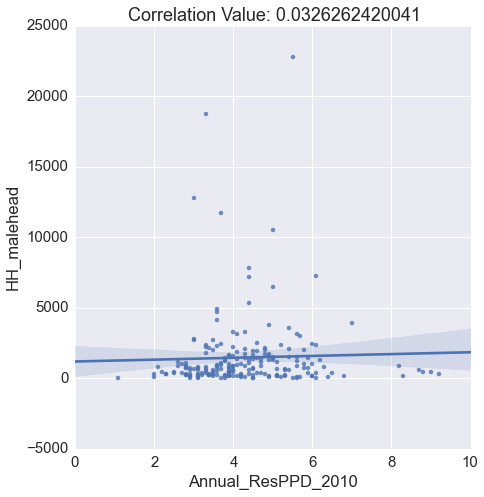

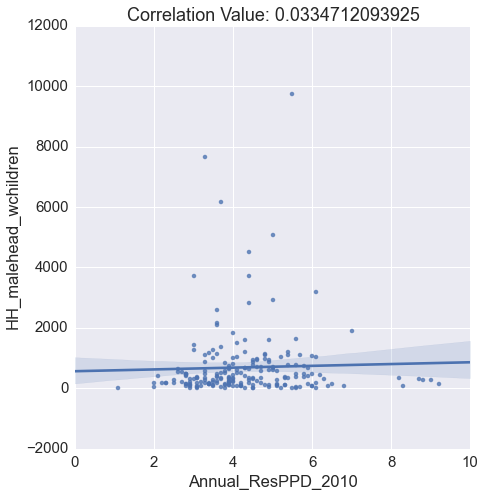

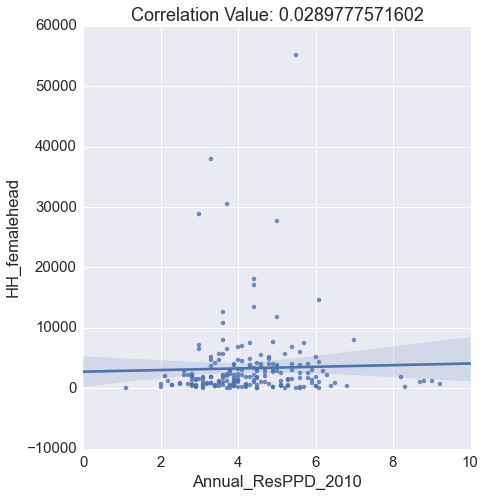

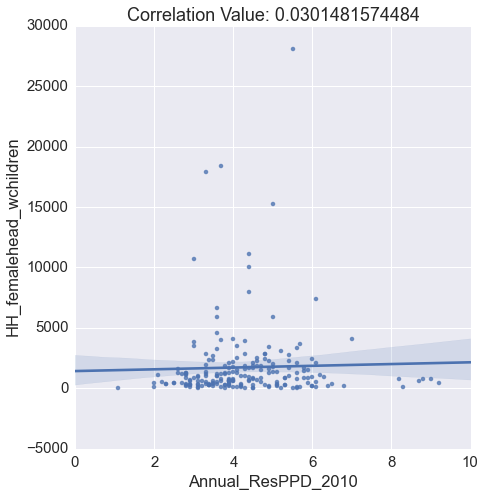

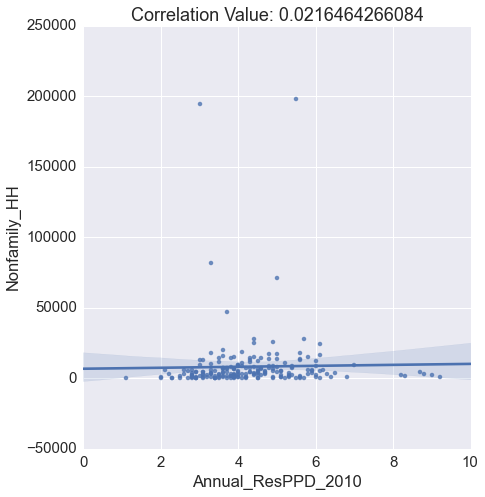

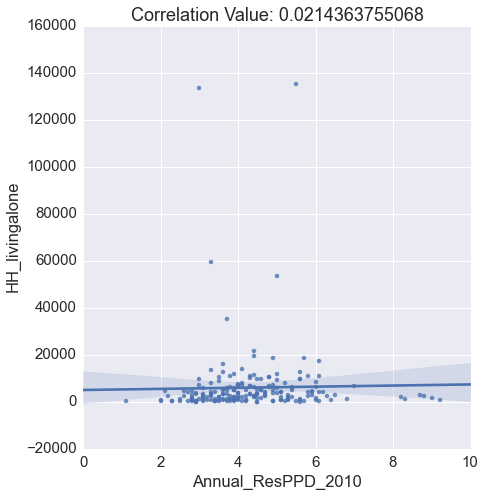

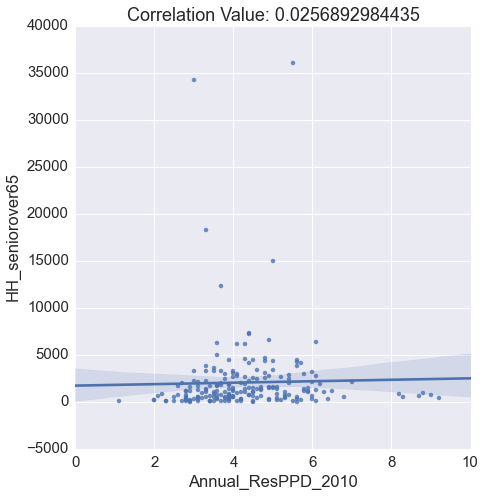

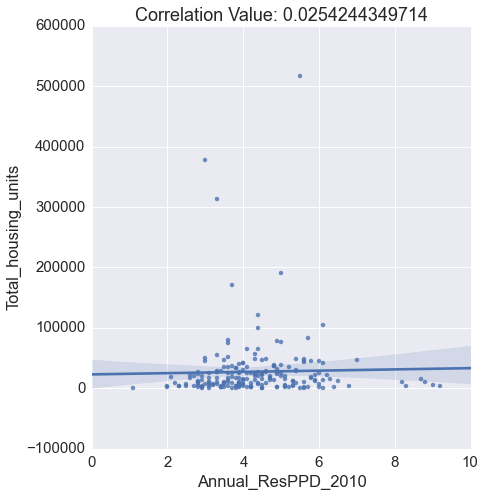

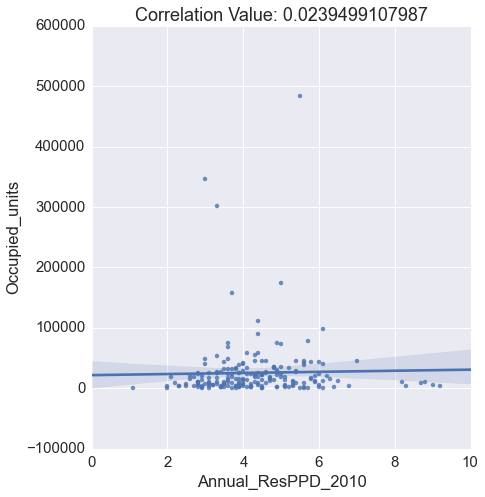

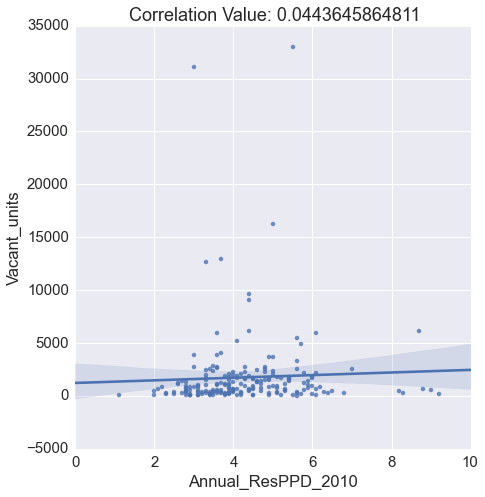

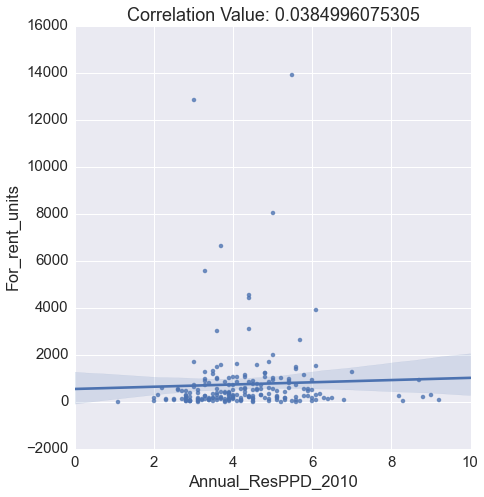

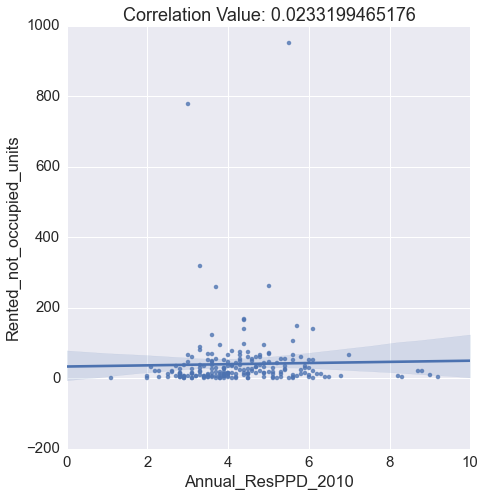

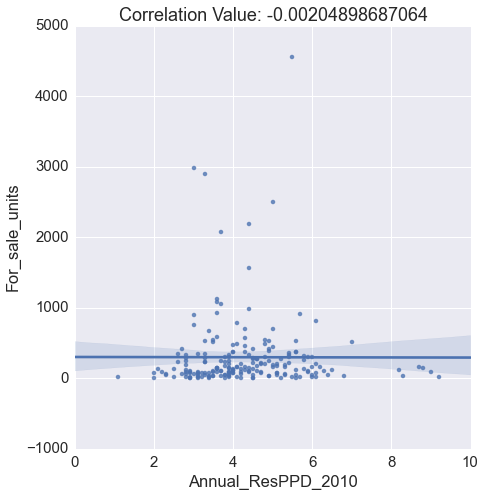

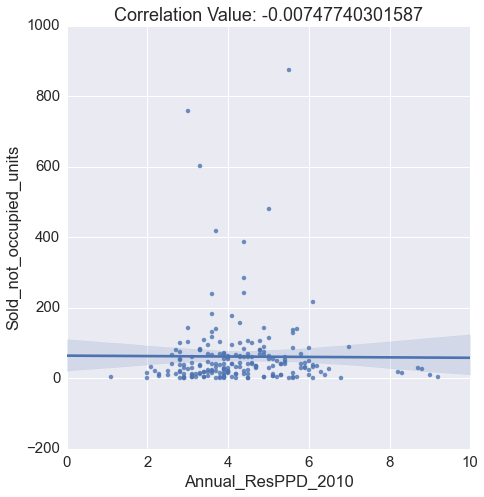

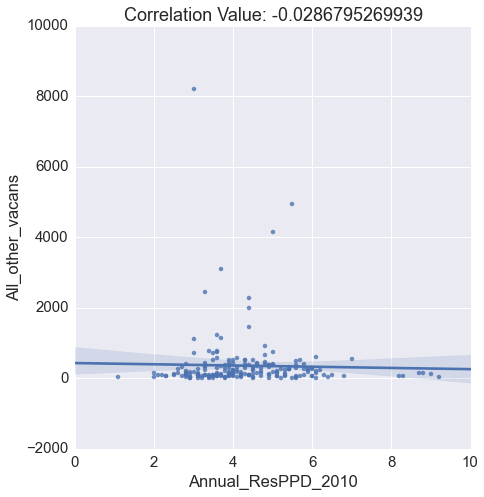

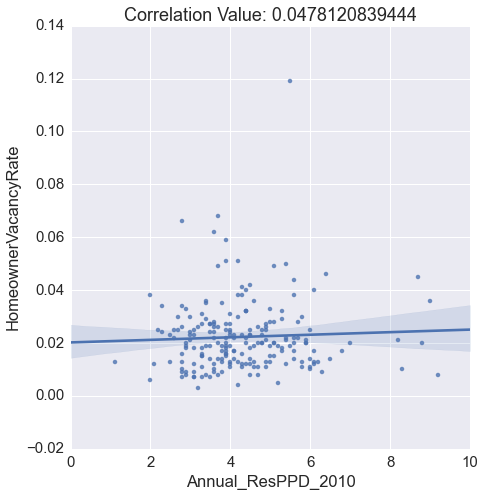

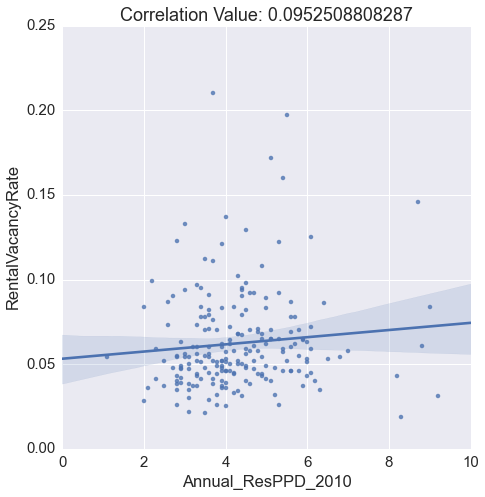

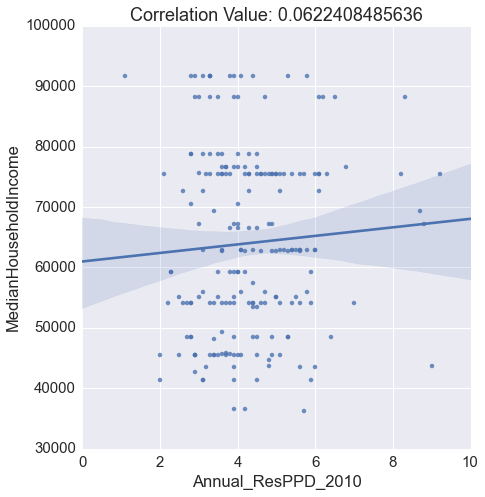

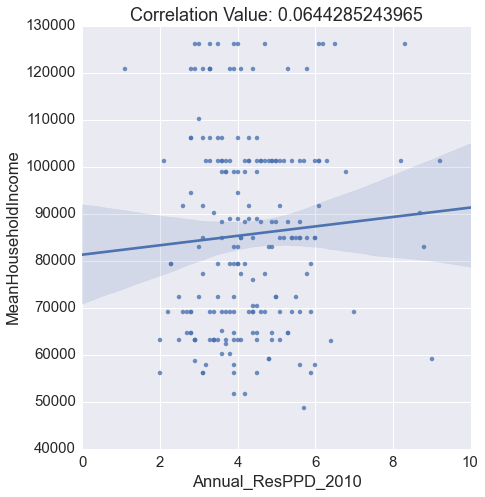

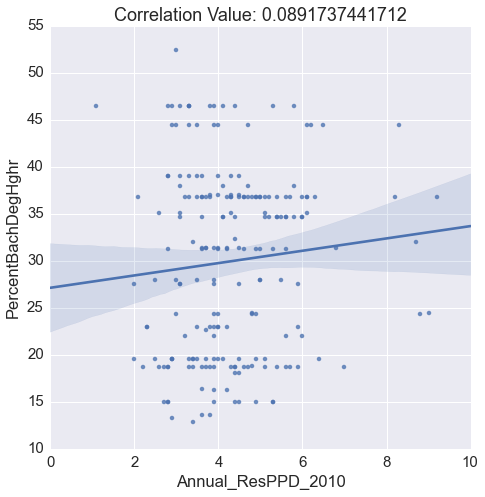

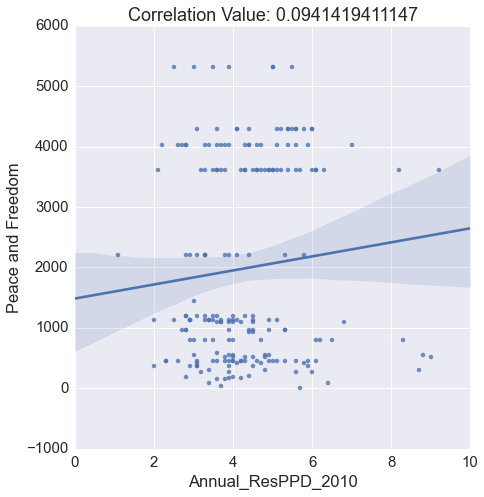

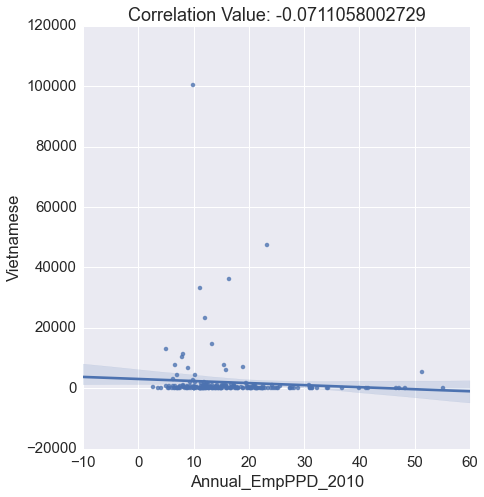

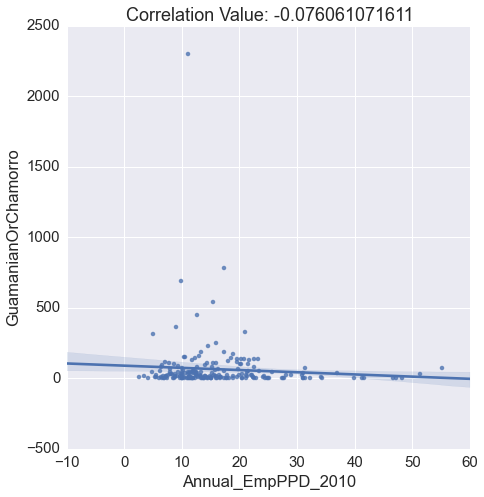

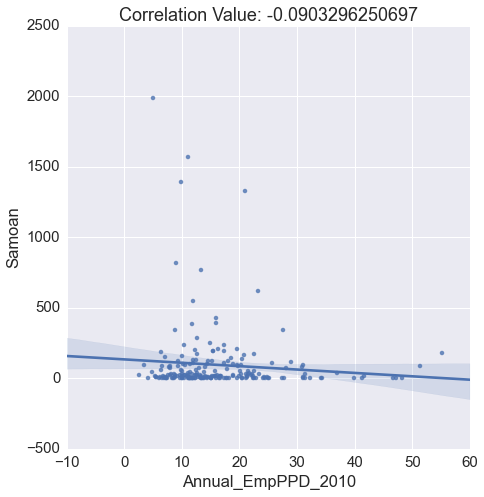

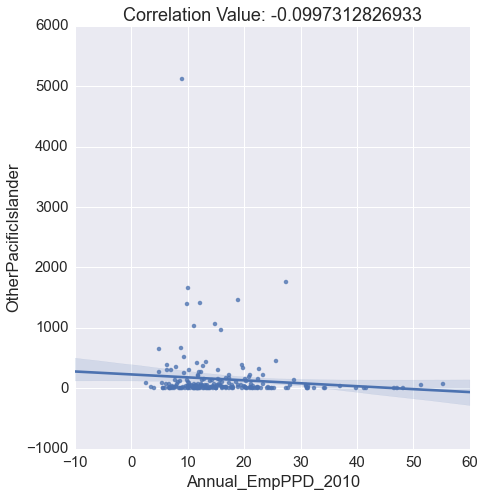

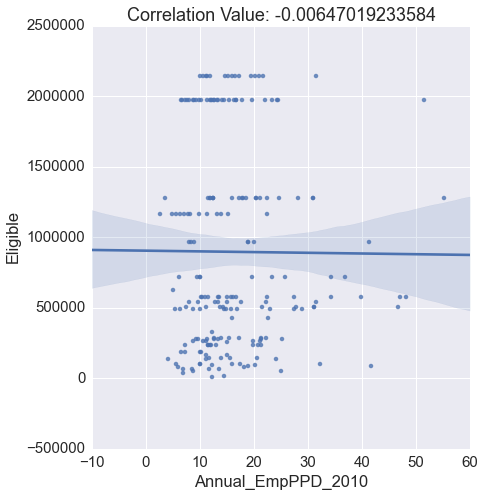

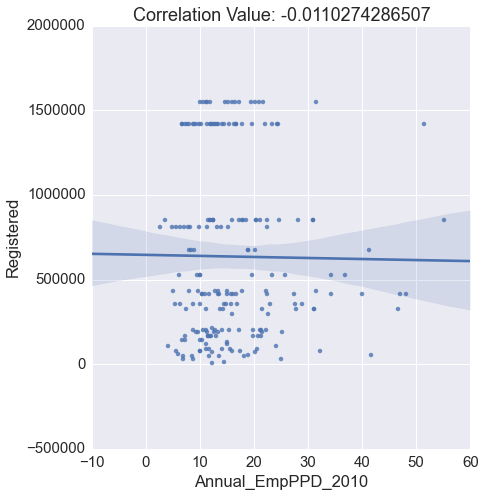

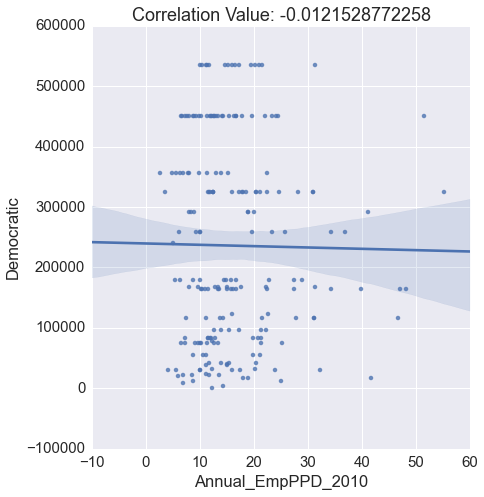

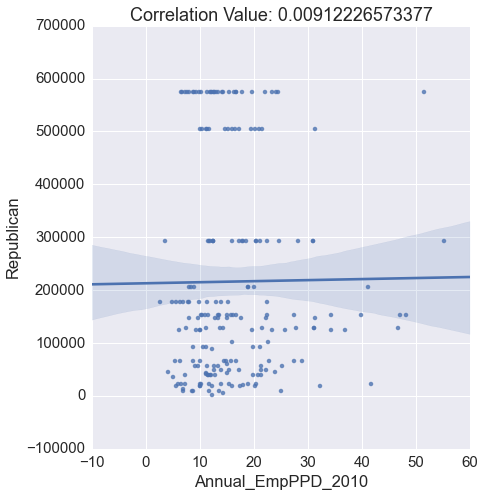

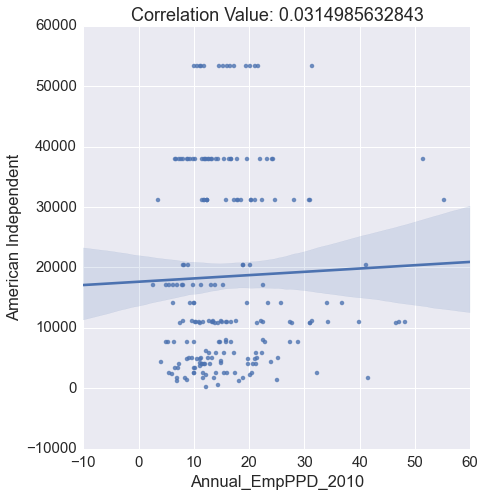

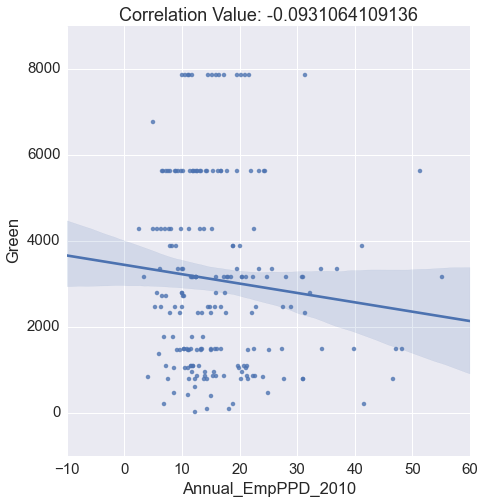

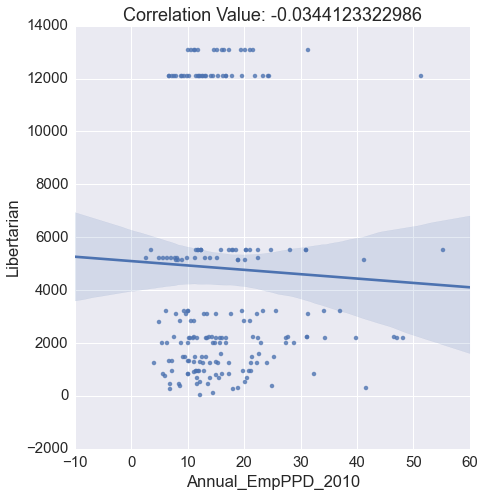

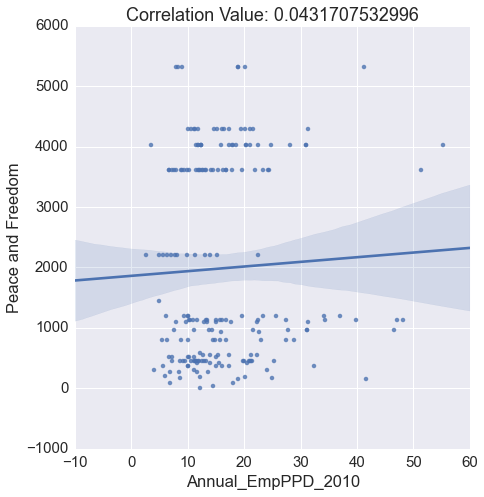

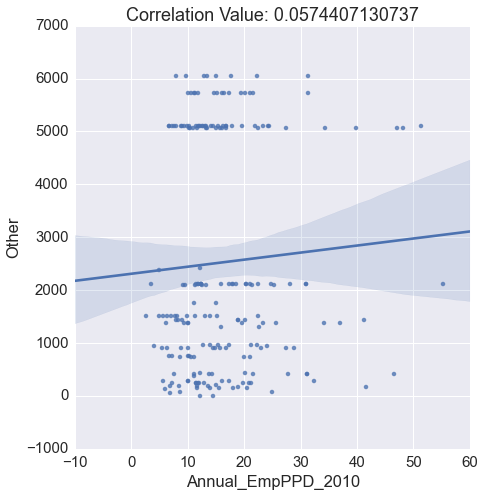

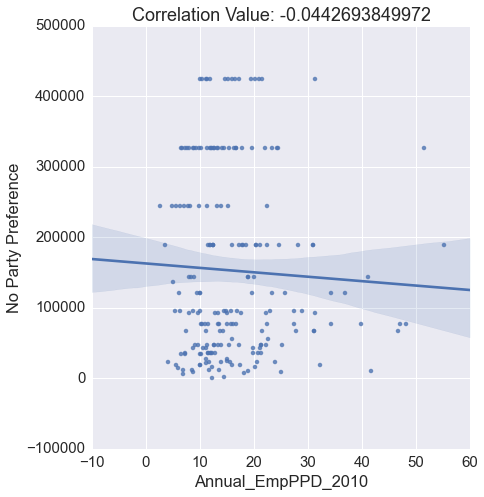

In [43]:
for (col1, col2, col3) in corr__belowOne_pairs:
    sns.lmplot(x=col1, y=col2, data=df, size=7) #hue="County", col="County" , scatter_kws={"s": 80}
#     g.set(xlim=(0,), ylim=(0,))
    plt.title('Correlation Value: %s' % col3 )

Good Candidates that show linear relationship between columns:
Annual_ResPPD_2010, Seasonal_units
Annual_EmpPPD_2010, Population
Annual_EmpPPD_2010, PersonsUnder5Year
Annual_EmpPPD_2010, PersonsAge21Plus
Annual_EmpPPD_2010, White
Annual_EmpPPD_2010, Chinese

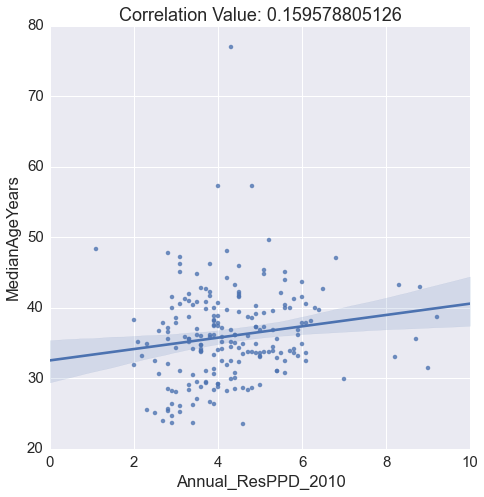

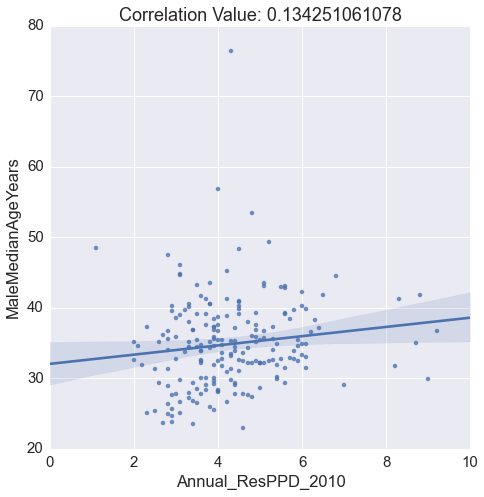

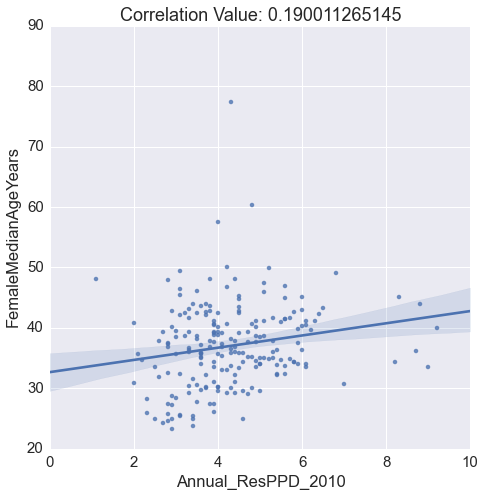

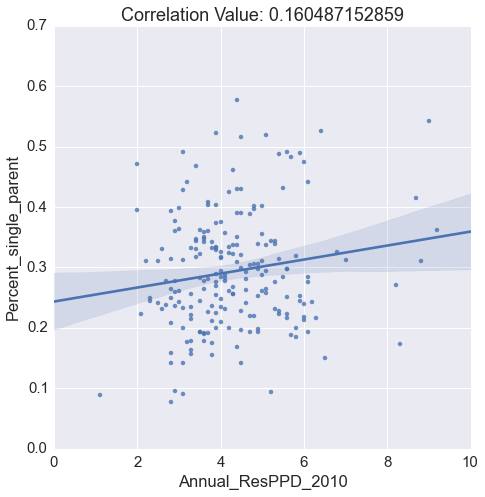

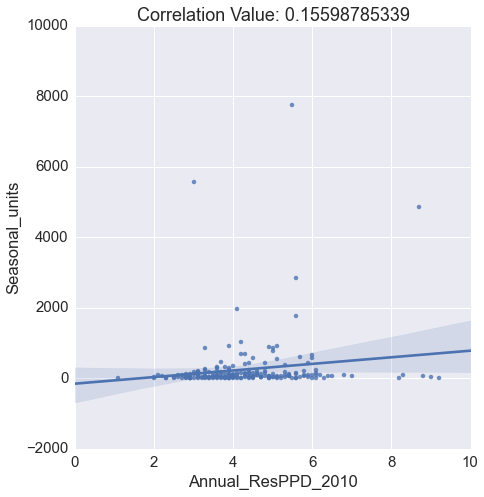

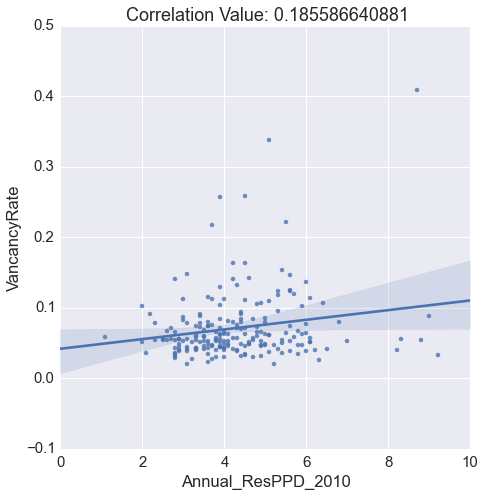

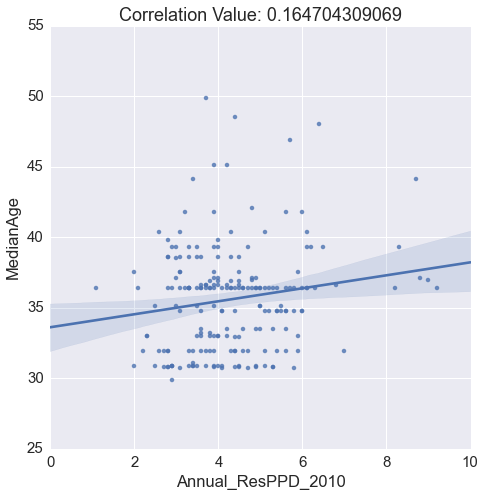

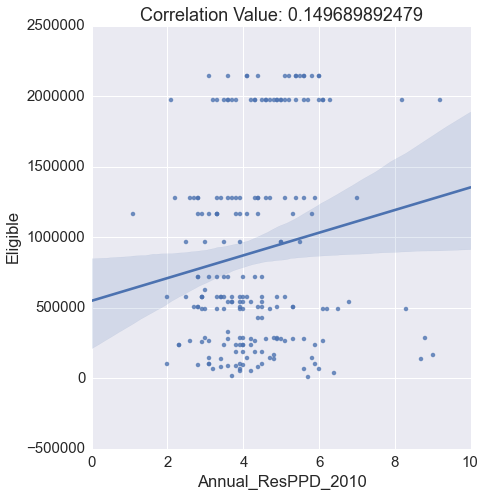

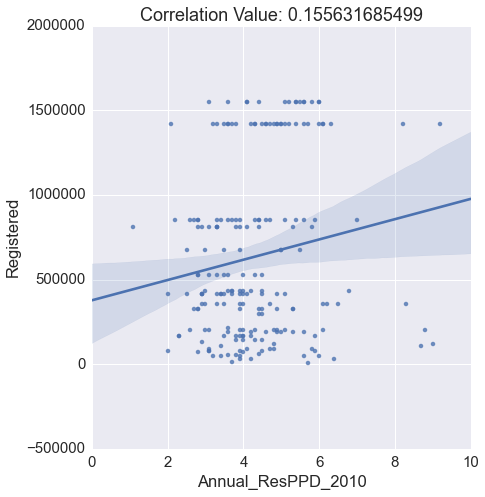

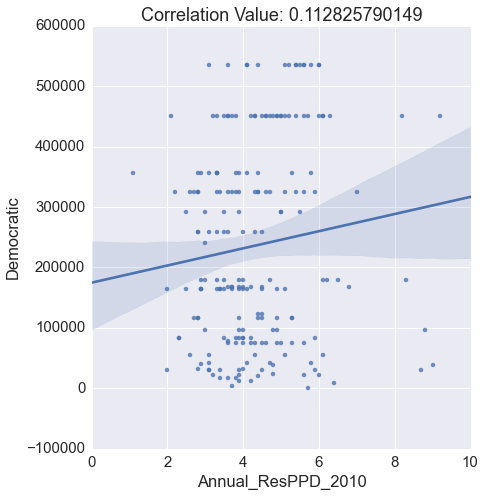

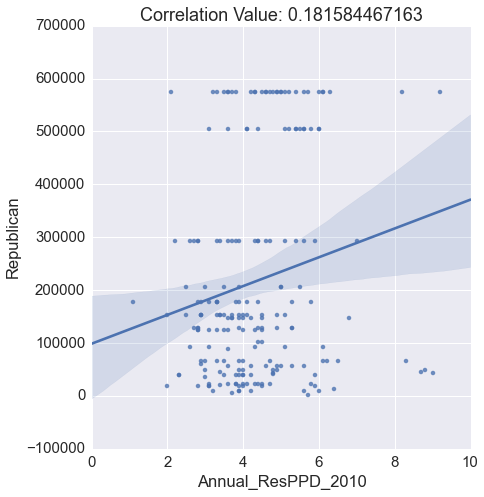

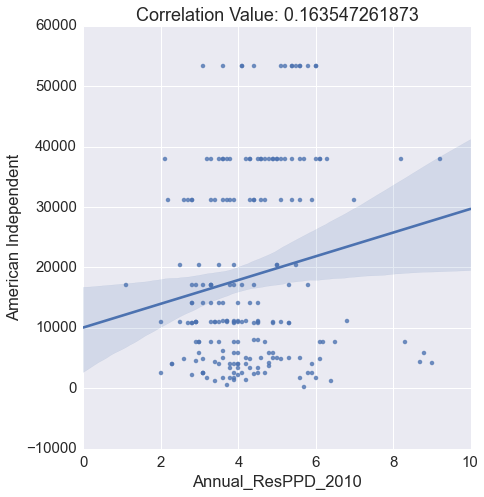

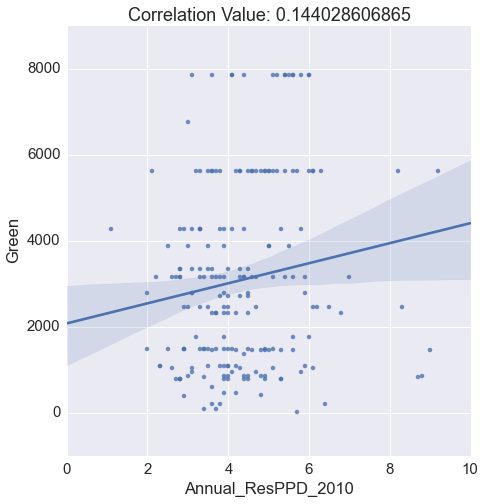

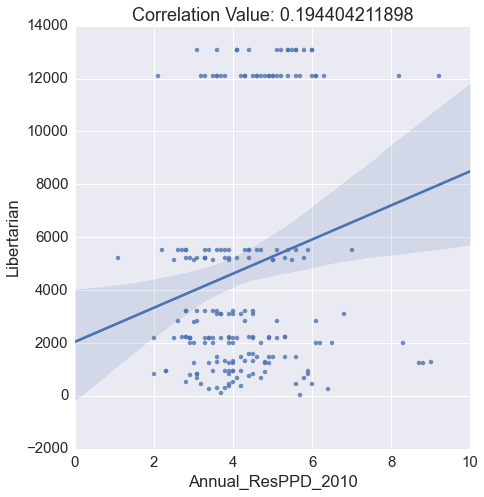

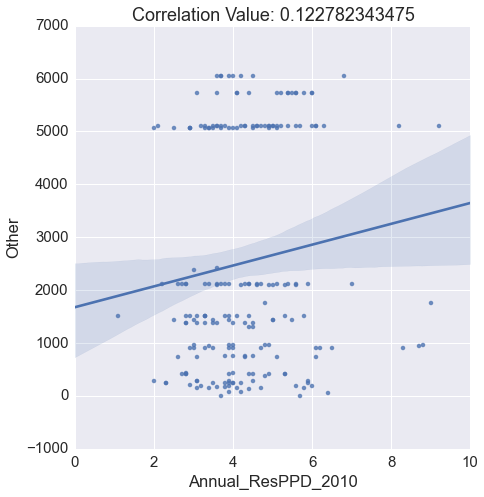

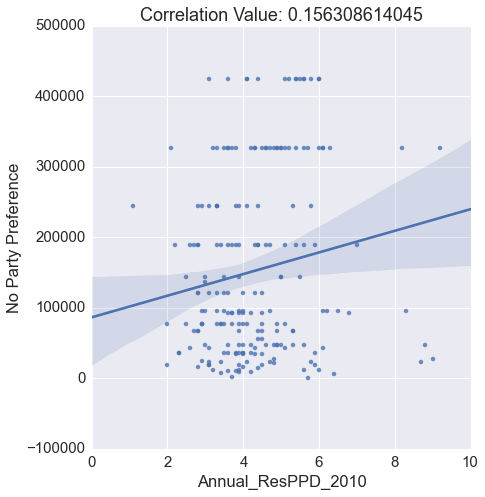

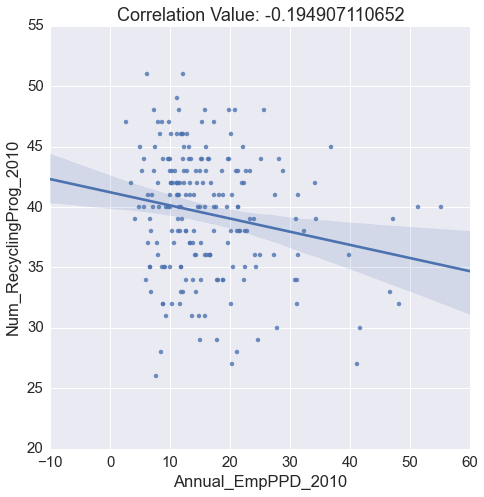

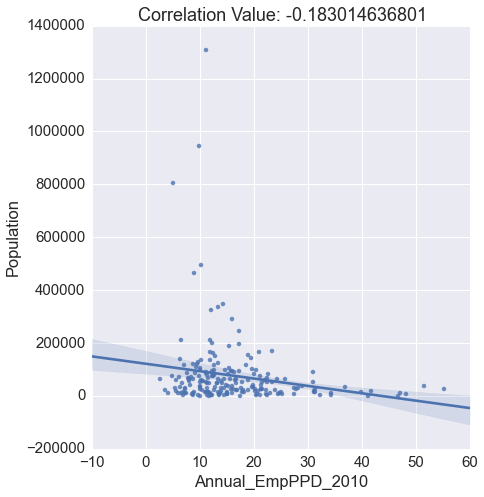

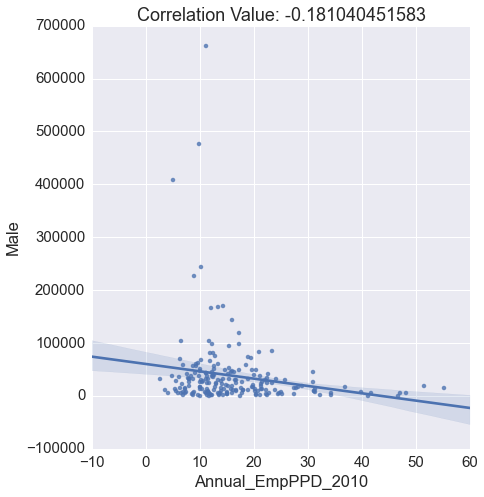

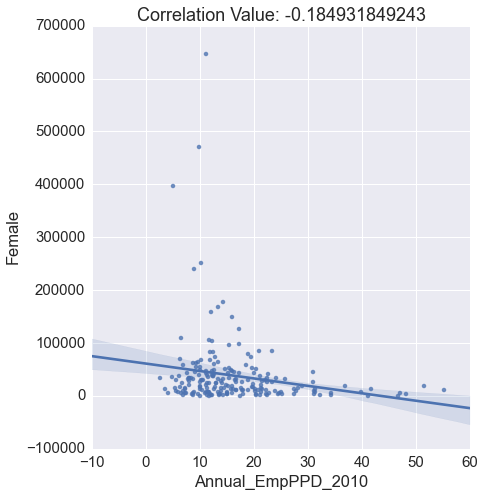

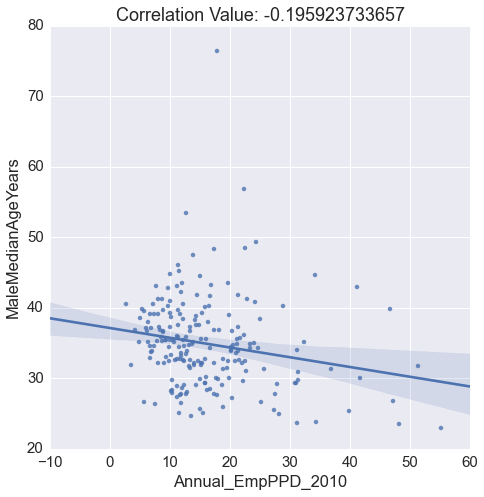

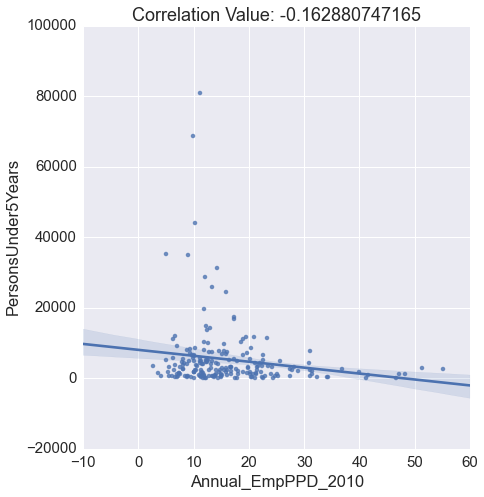

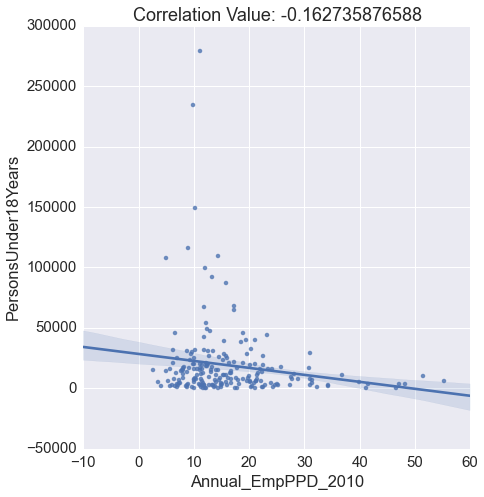

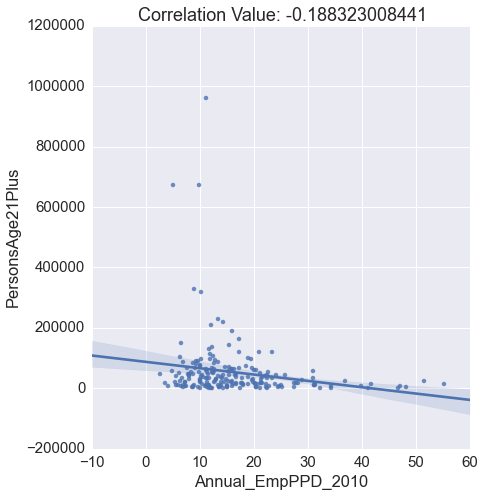

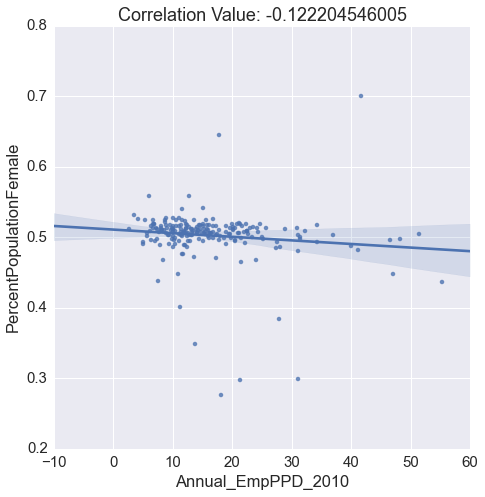

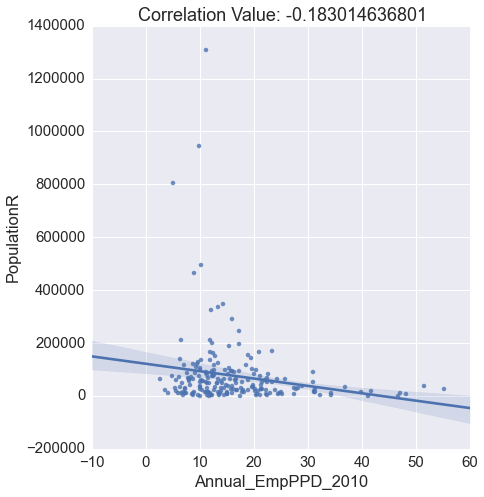

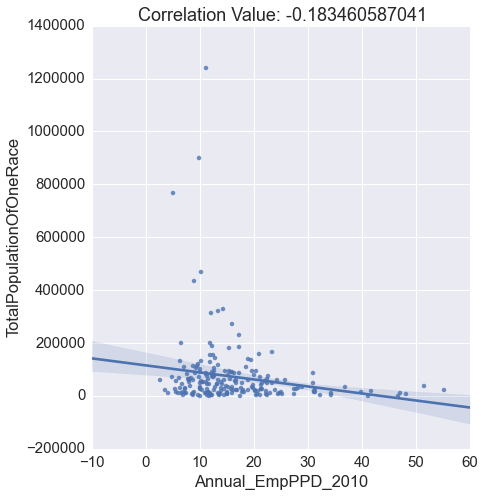

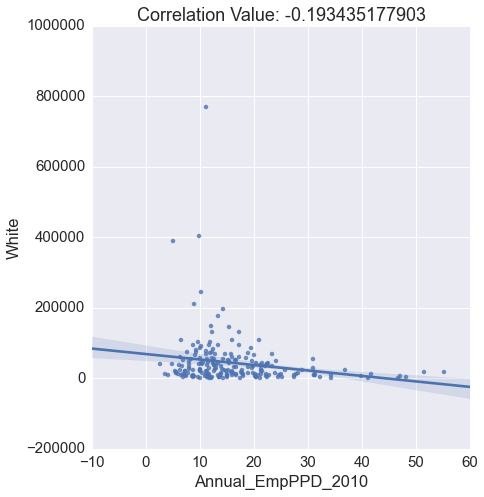

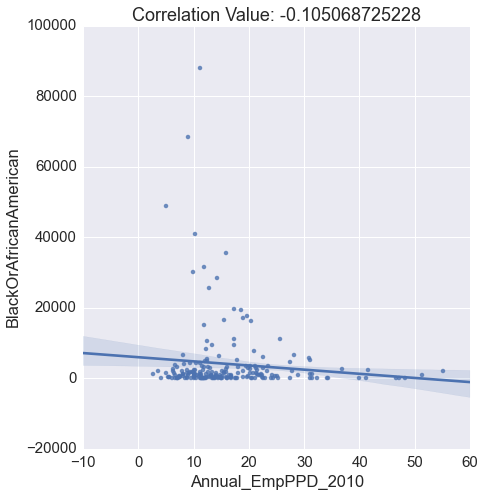

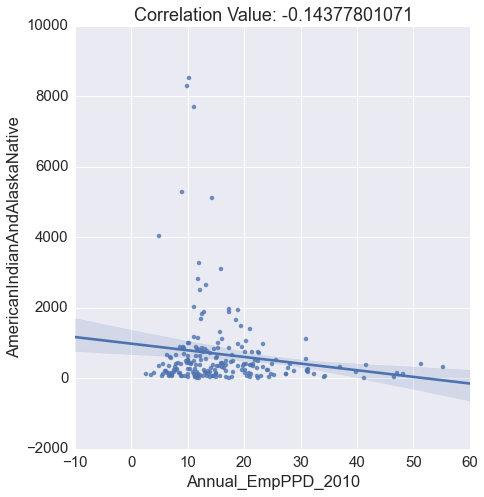

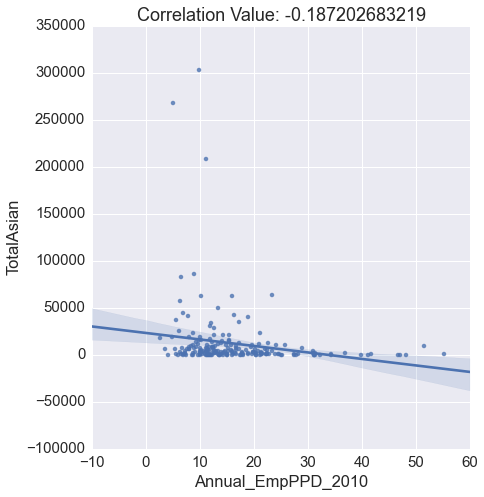

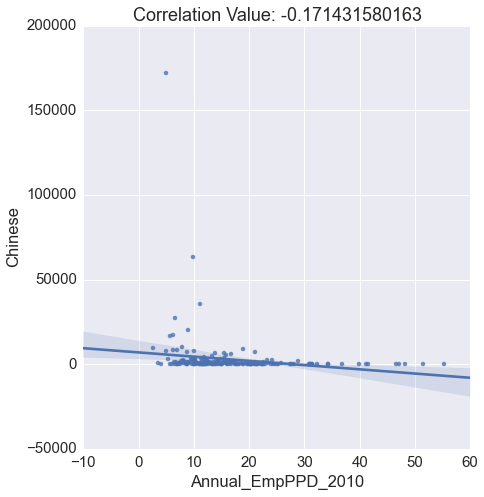

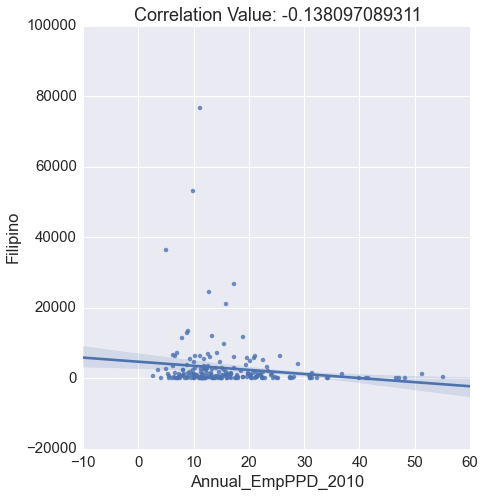

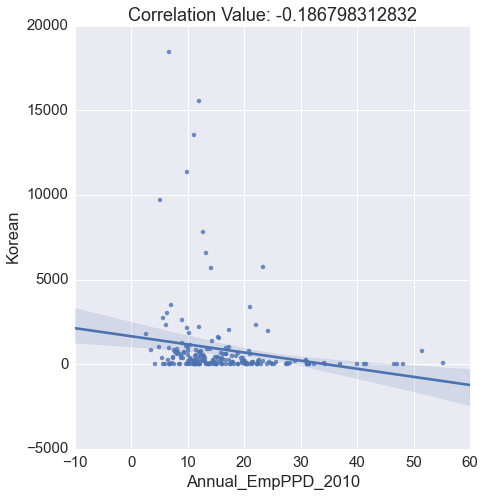

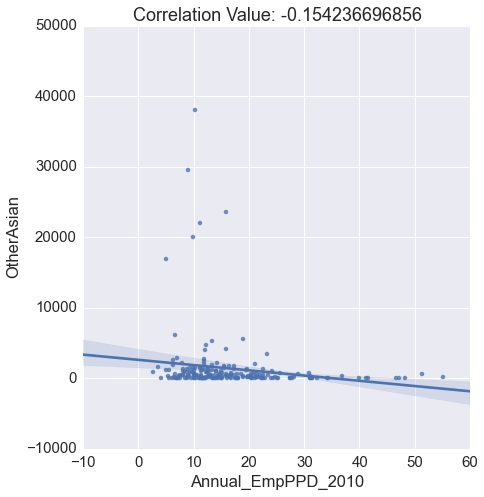

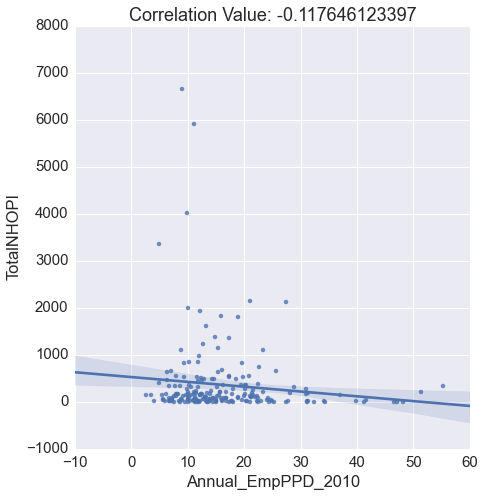

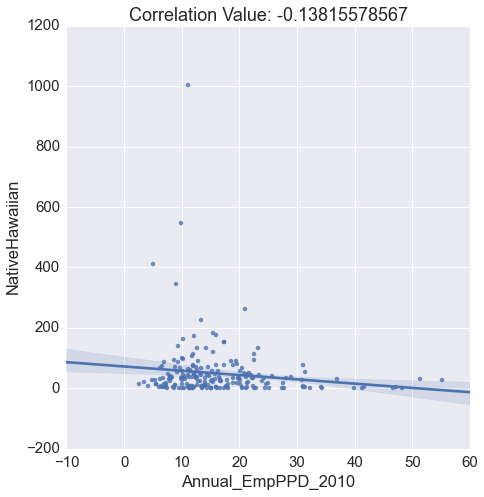

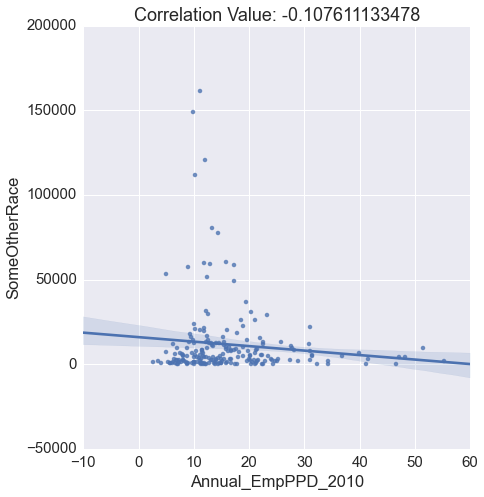

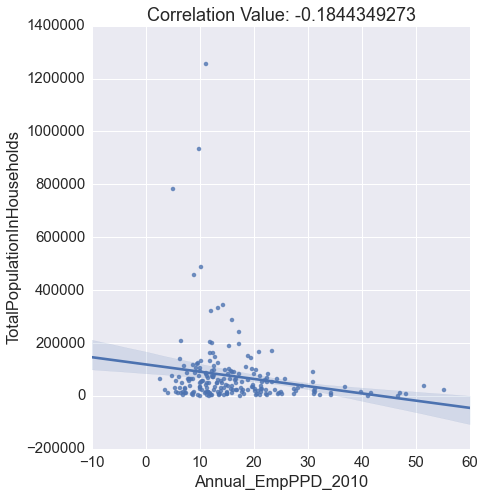

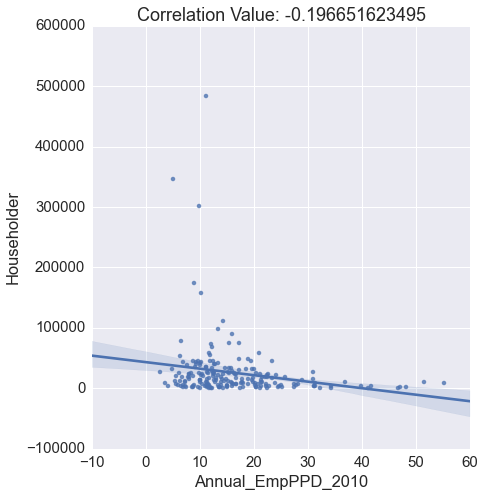

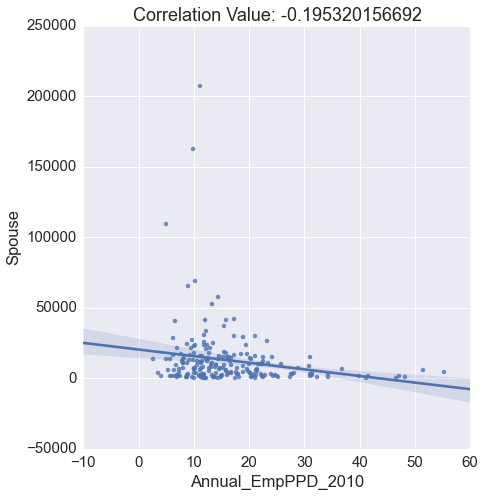

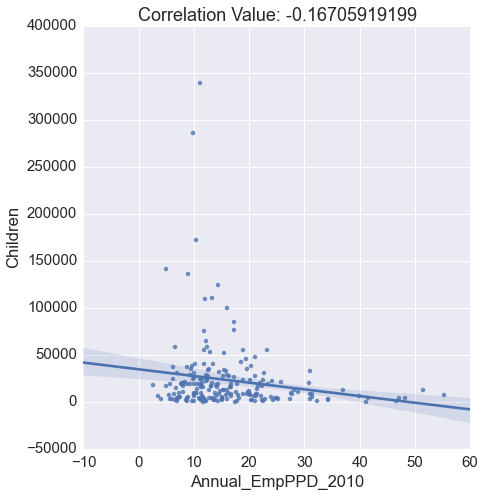

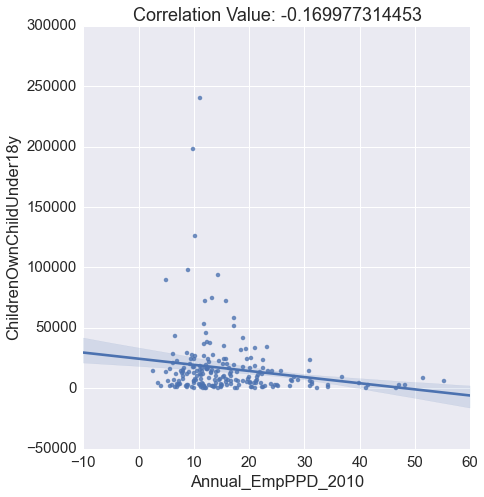

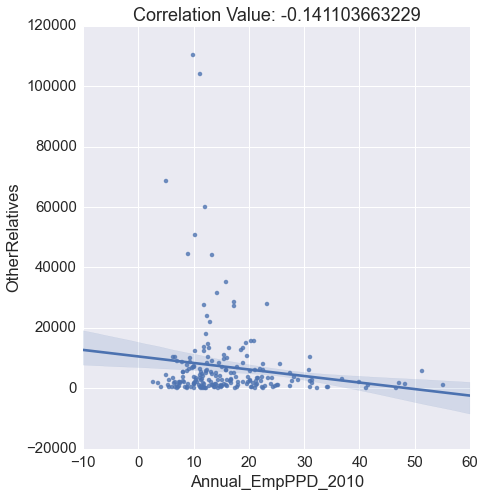

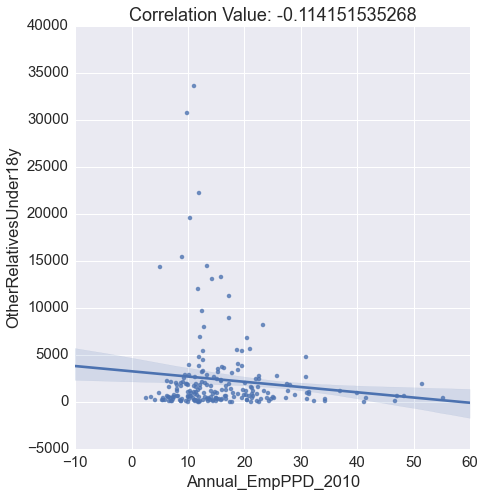

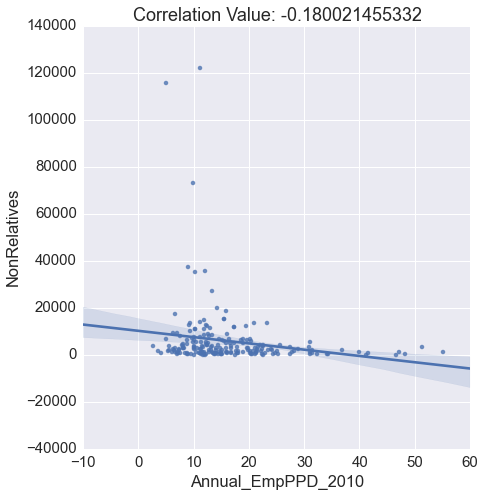

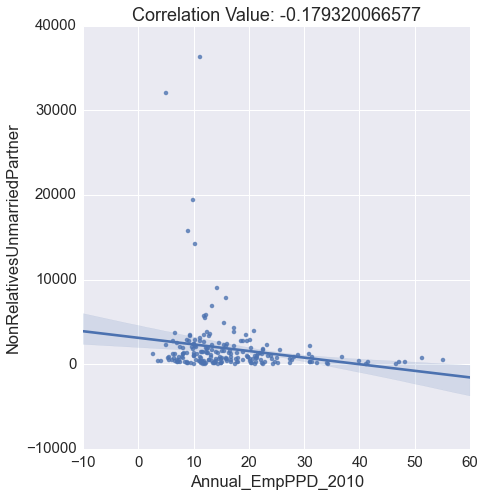

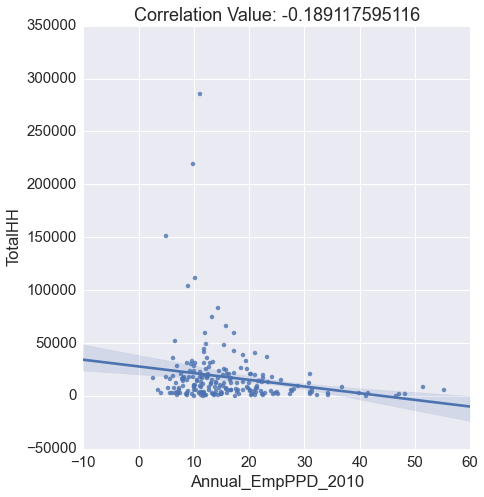

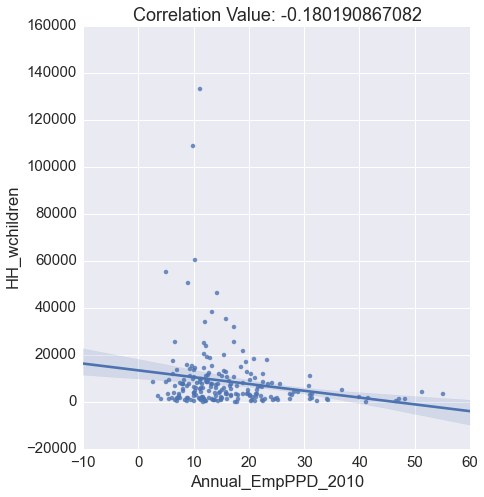

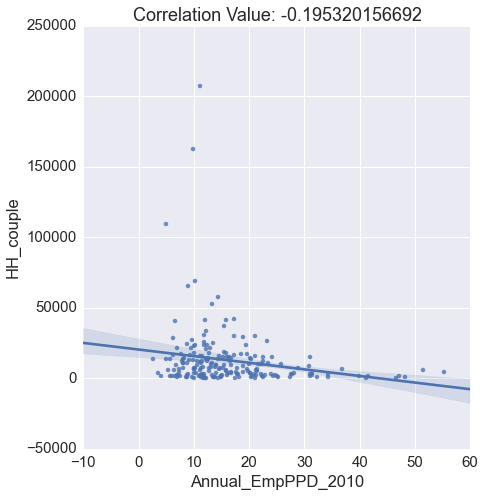

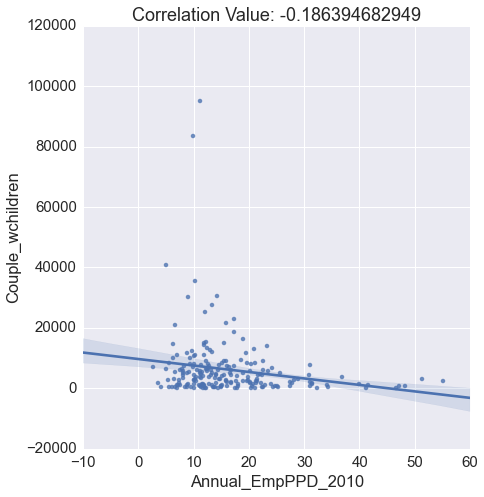

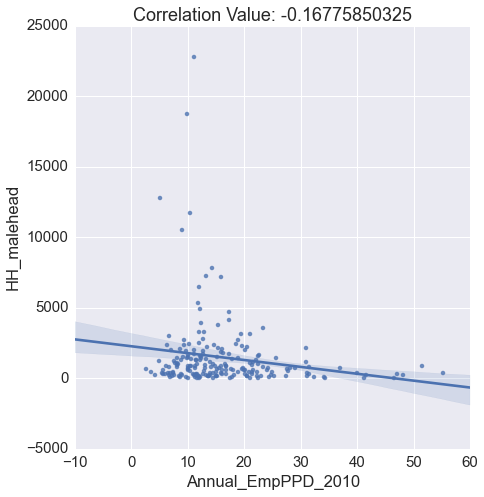

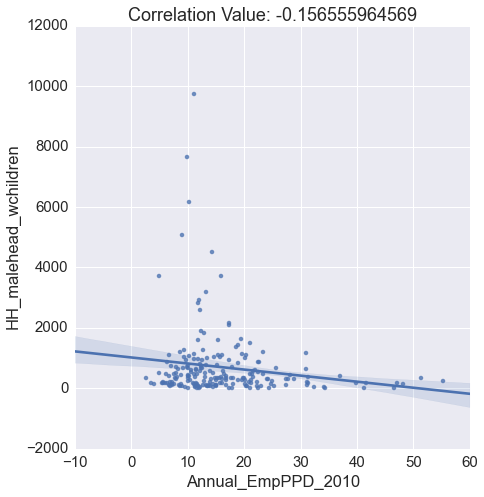

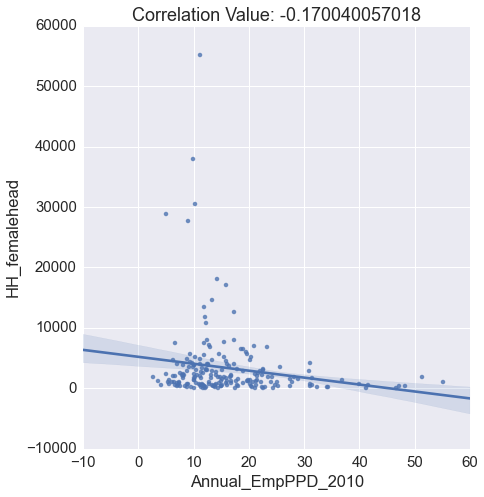

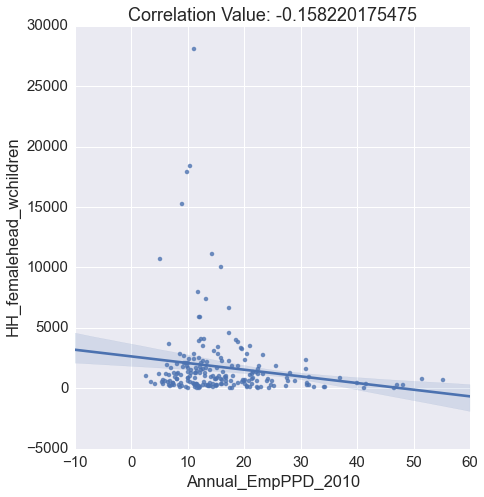

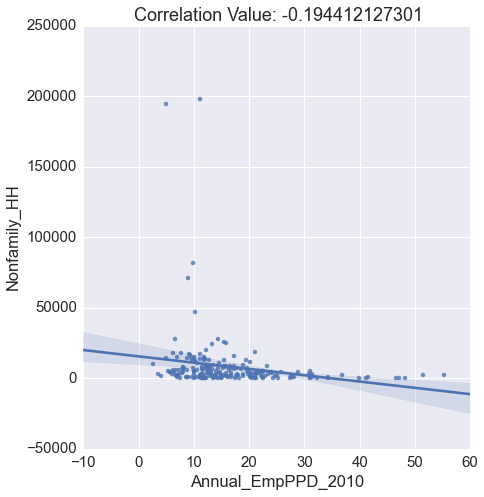

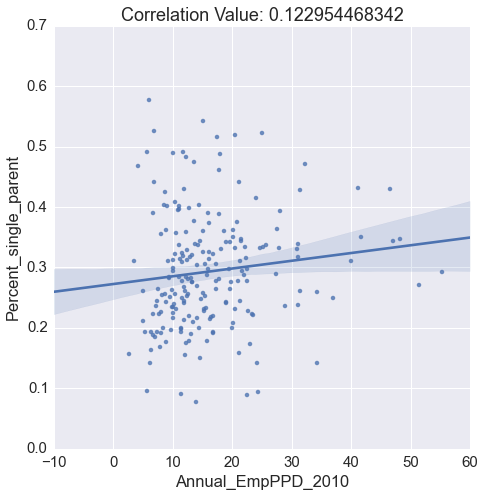

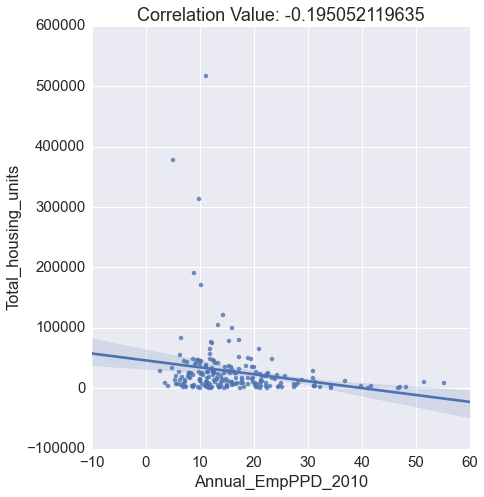

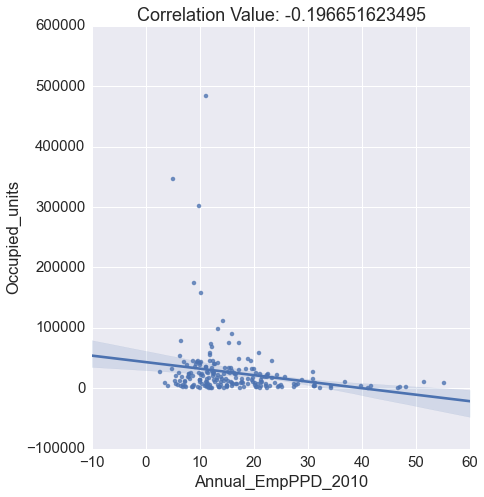

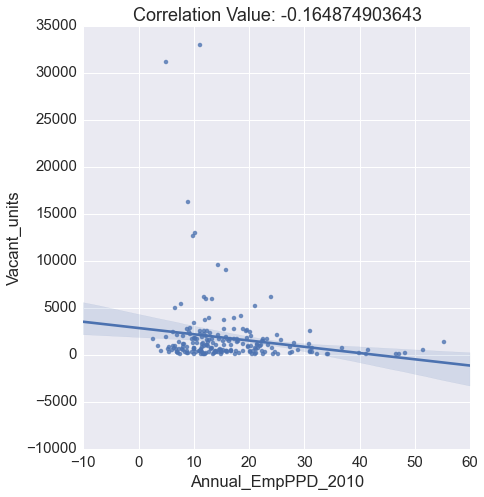

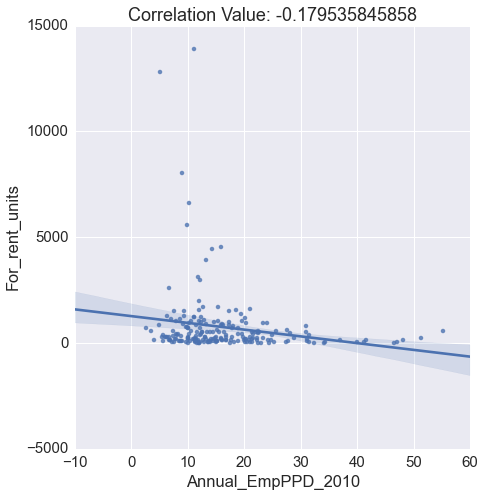

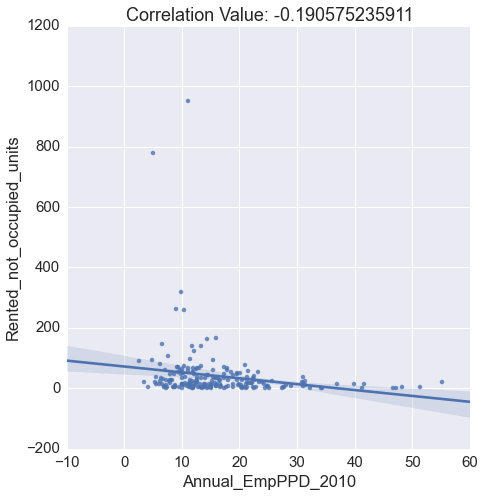

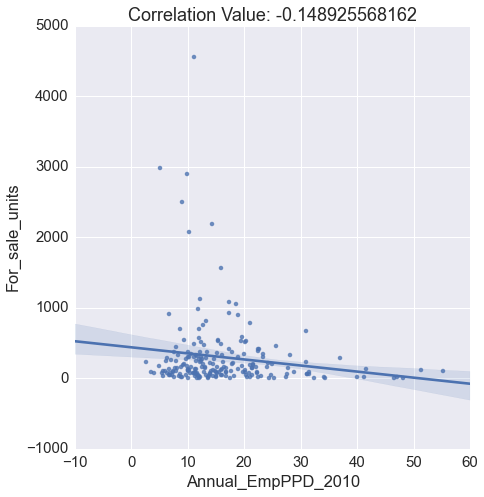

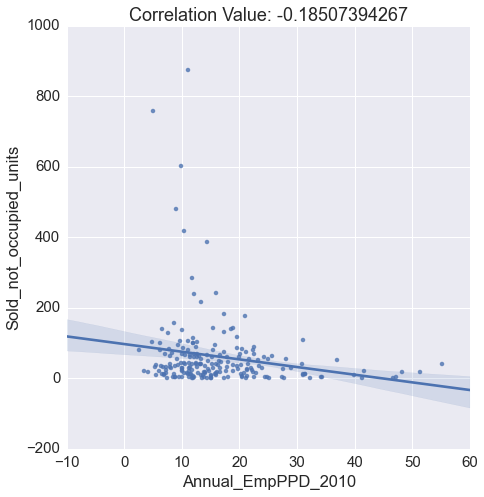

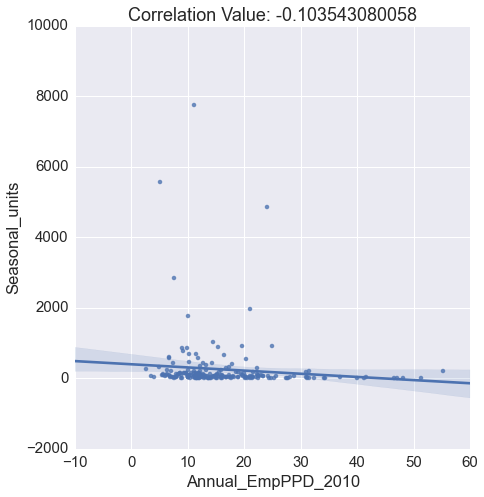

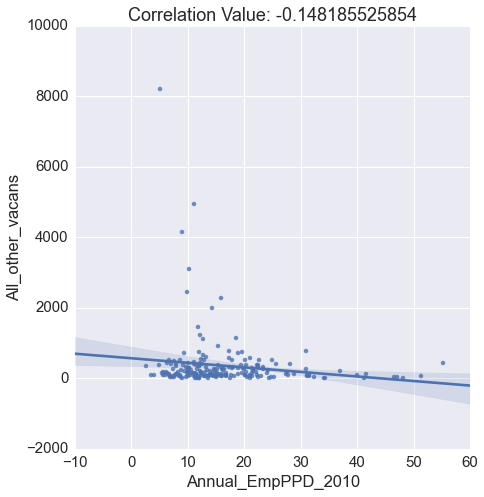

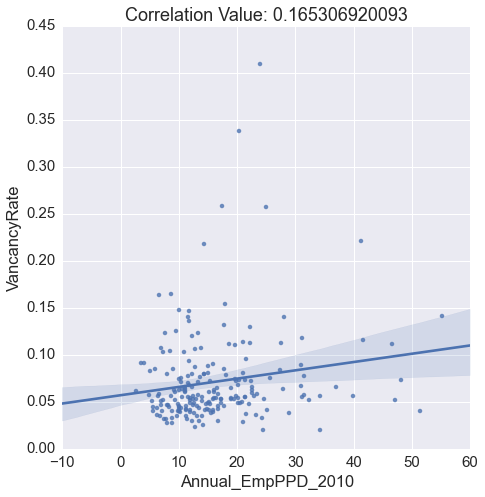

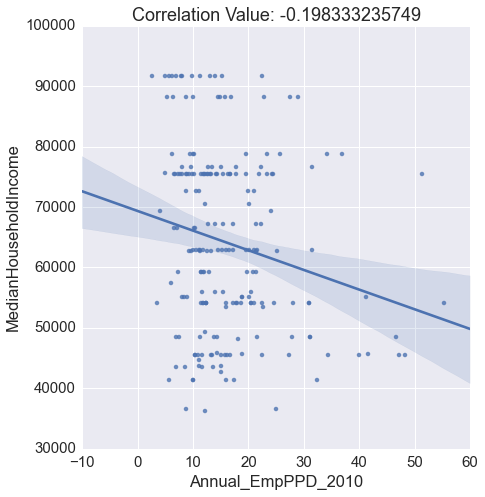

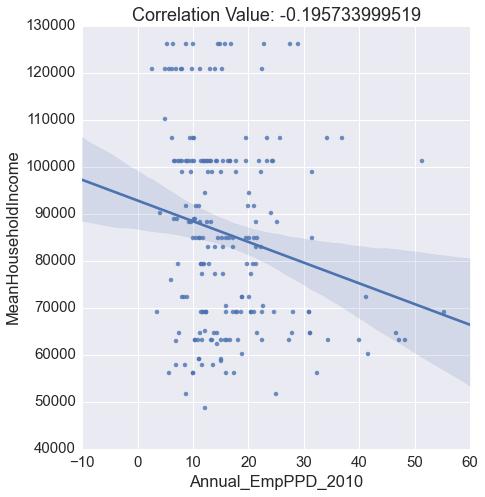

In [44]:
for (col1, col2, col3) in corr__belowTwo_pairs:
    sns.lmplot(x=col1, y=col2, data=df, size=7) #hue="County", col="County" , scatter_kws={"s": 80}
#     g.set(xlim=(0,), ylim=(0,))
    plt.title('Correlation Value: %s' % col3 )

Good Candidates that show linear relationship between columns:
Annual_EmpPPD_2010, PersonsAge60Plus
Annual_EmpPPD_2010, PersonsAge65Plus
Annual_EmpPPD_2010, AsianIndian
Annual_EmpPPD_2010, HH_livingAlone

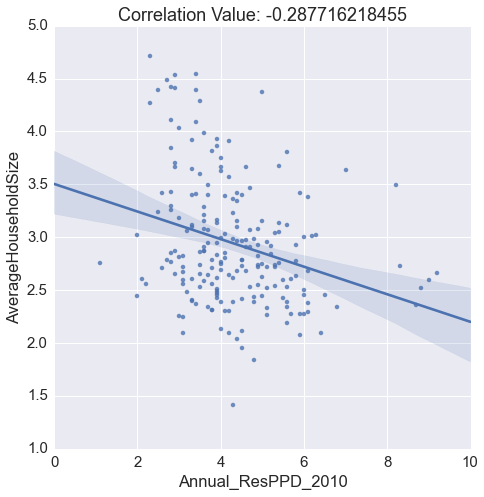

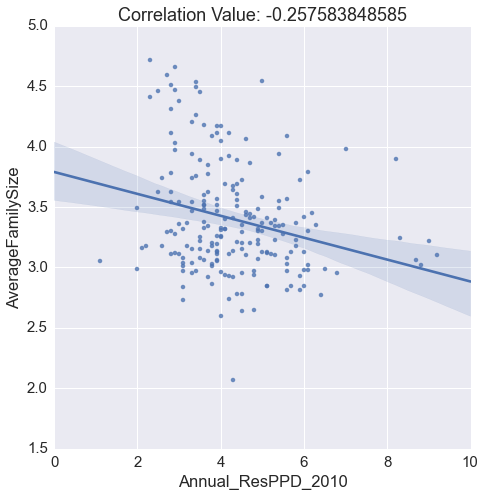

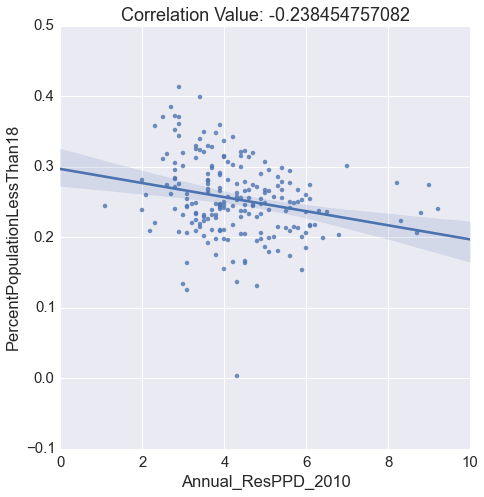

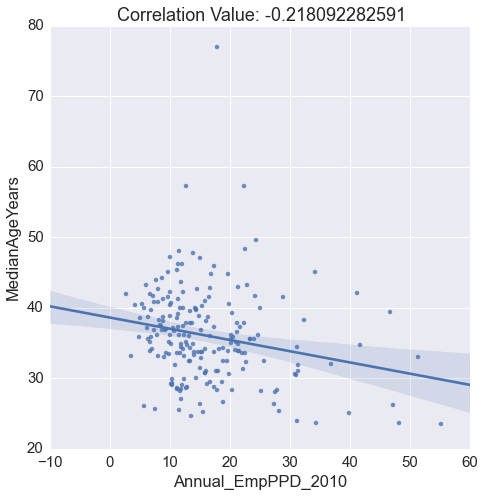

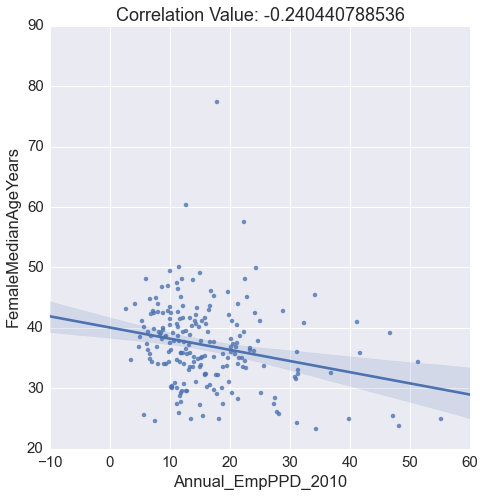

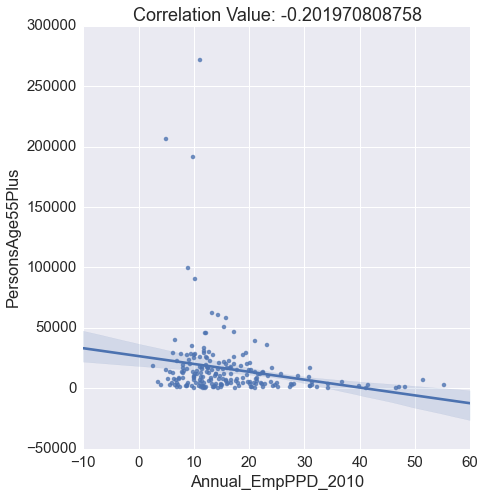

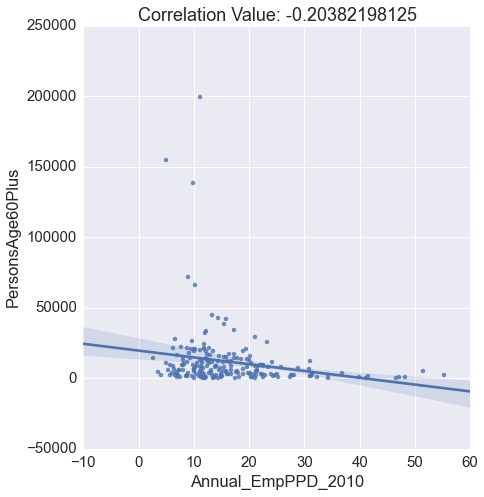

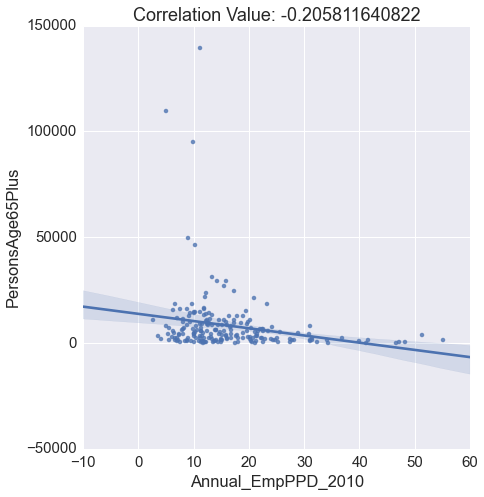

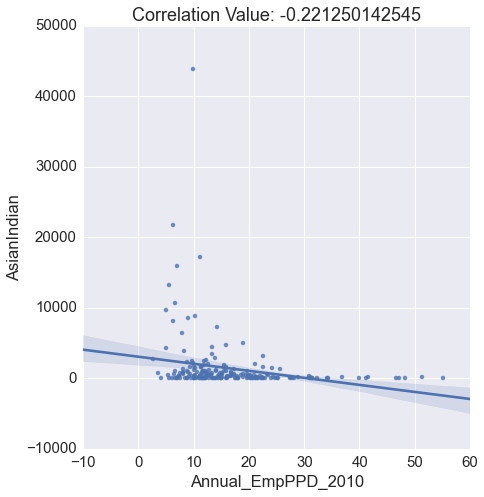

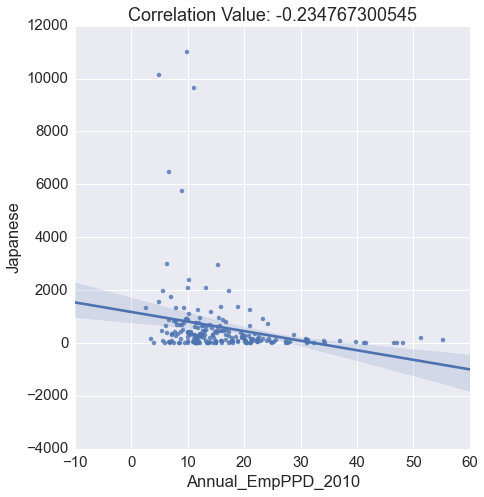

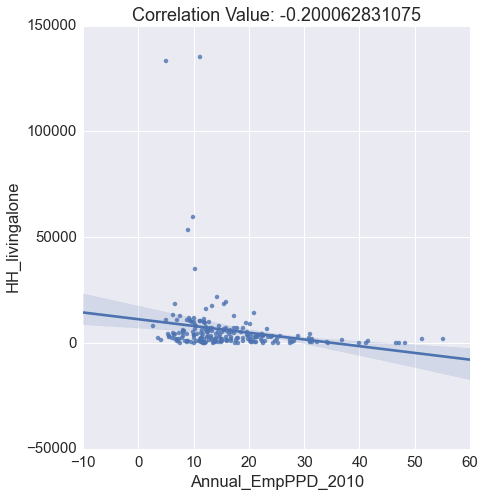

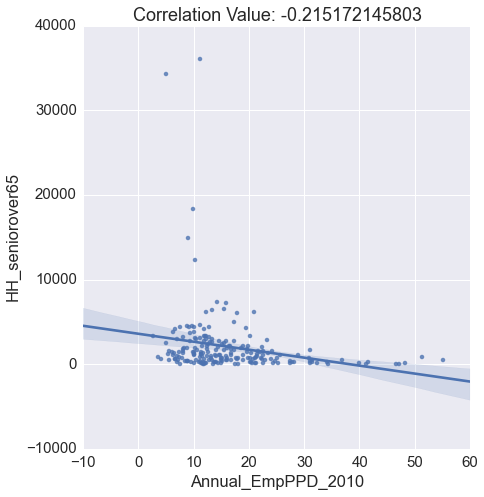

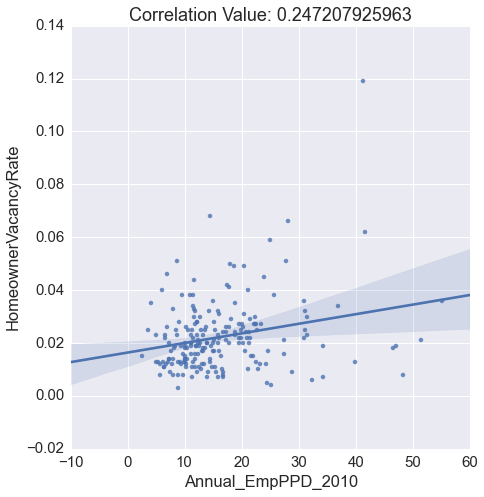

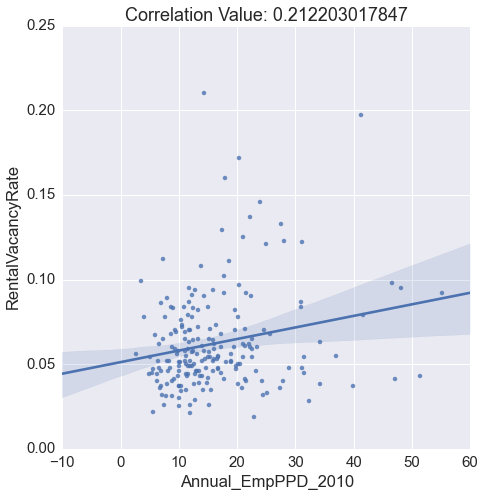

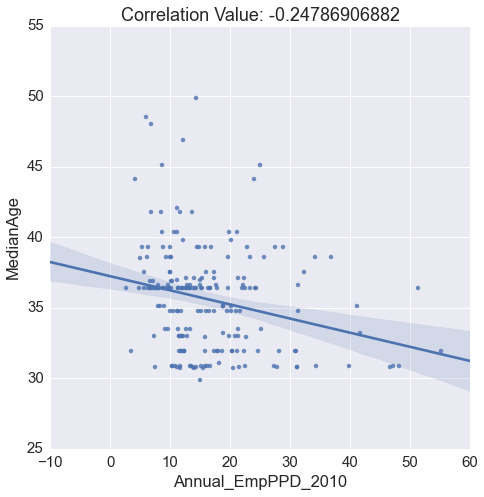

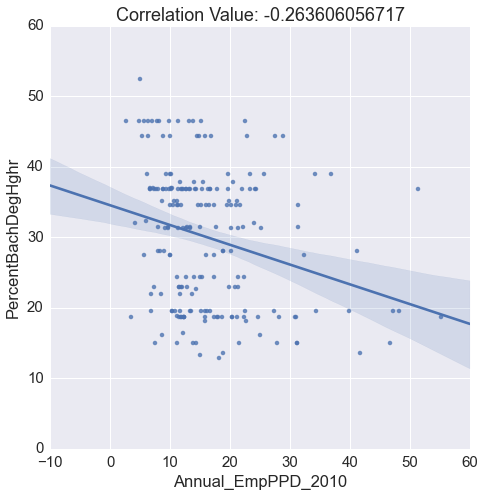

In [45]:
for (col1, col2, col3) in corr__belowThree_pairs:
    sns.lmplot(x=col1, y=col2, data=df, size=7) #hue="County", col="County"
    plt.title('Correlation Value: %s' % col3 )

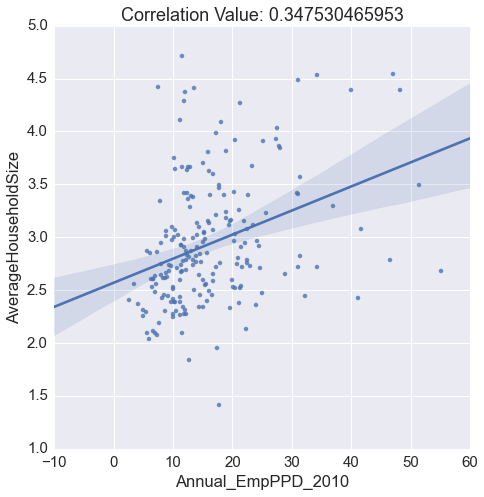

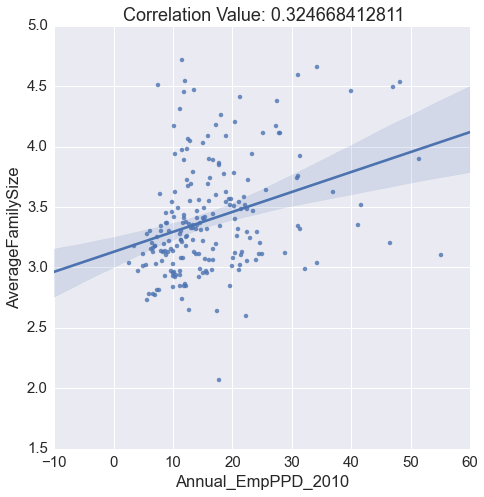

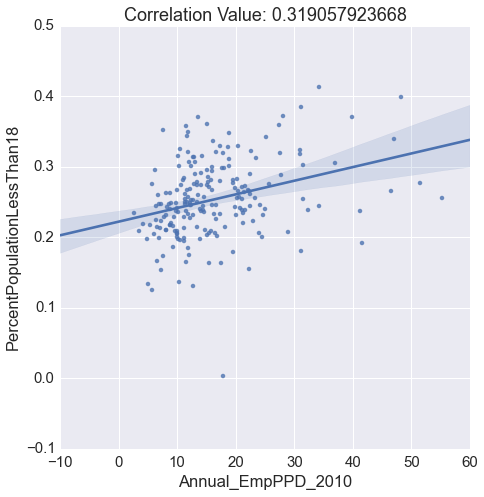

In [46]:
for (col1, col2, col3) in corr__belowFour_pairs:
    sns.lmplot(x=col1, y=col2, data=df, size=7) #hue="County", col="County"
    plt.title('Correlation Value: %s' % col3 )

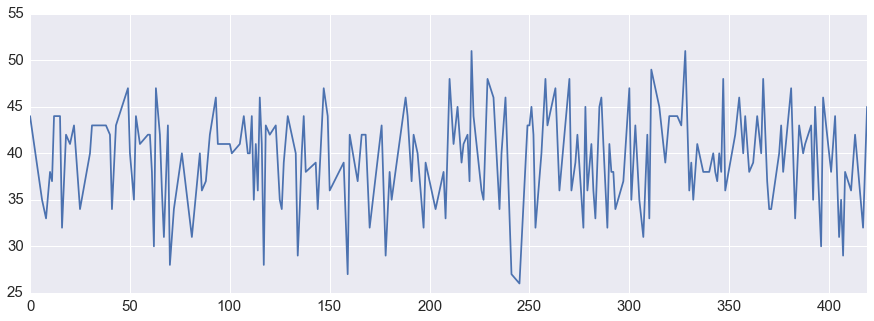

In [47]:
# df[df > df.std() * 3]
# df['County'].unique()
# df[np.abs(df-df.mean())<=(3*df.std())]
df['Num_RecyclingProg_2010'].plot(figsize=(15,5));
# df['Num_RecyclingProg_2010'][df['County'] == 'San Bernardino']#.plot()

(array([  1.,  12.,  46.,  58.,  43.,  26.,  12.,   2.,   2.,   4.]),
 array([ 1.1 ,  1.91,  2.72,  3.53,  4.34,  5.15,  5.96,  6.77,  7.58,
         8.39,  9.2 ]),
 <a list of 10 Patch objects>)

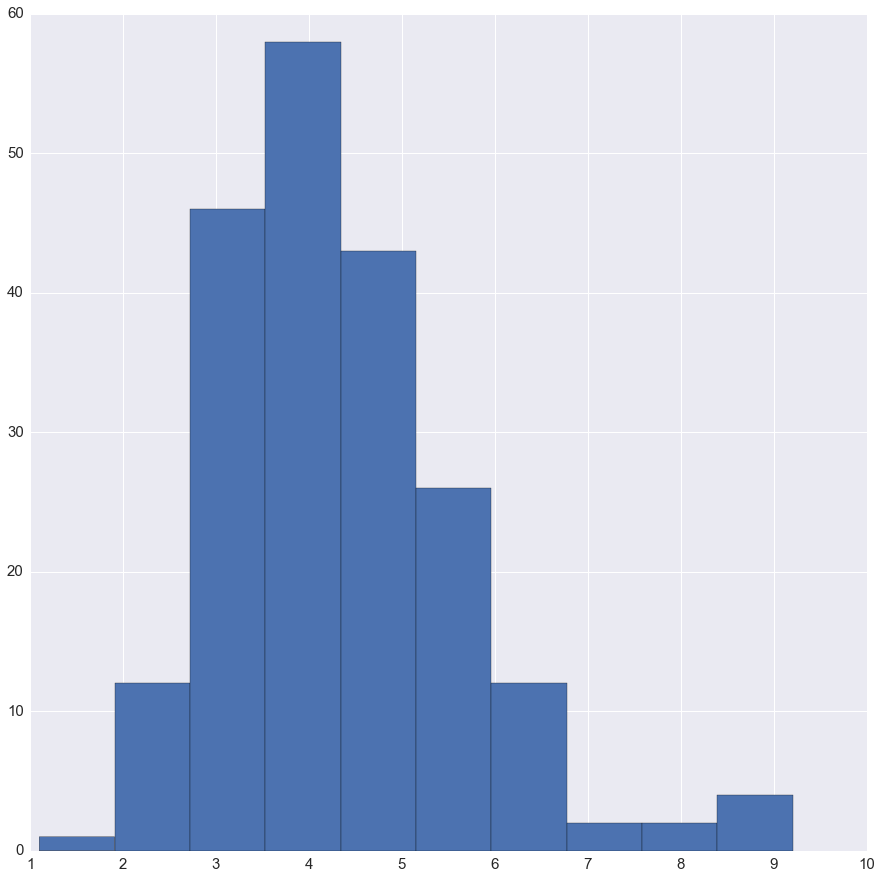

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Annual_ResPPD_2010'], bins = 10)

(0, 60)

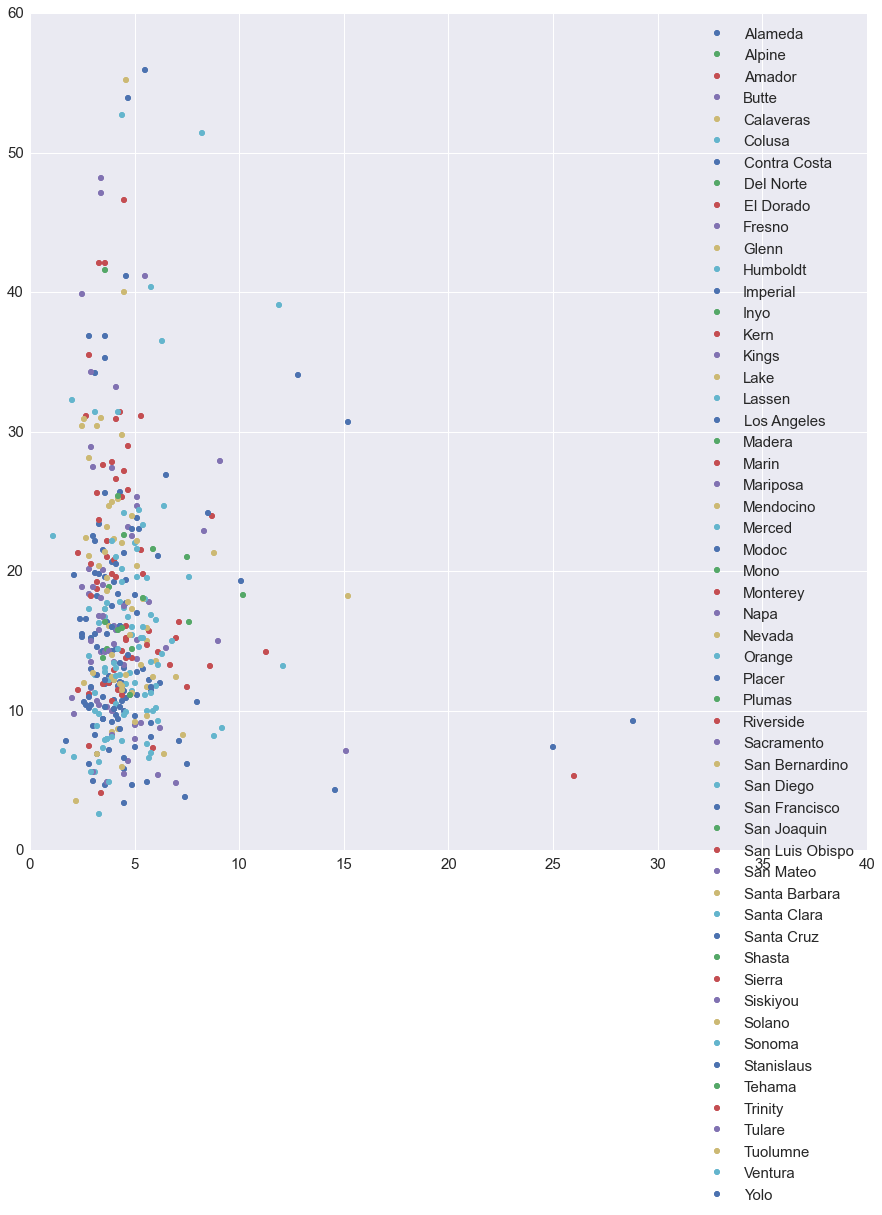

In [49]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in grouped:
    ax.plot(group['Annual_ResPPD_2010'], group['Annual_EmpPPD_2010'], marker='.', linestyle='', ms=12, label=name)
ax.legend()

plt.xlim(0, 40)
plt.ylim(0, 60)
# plt.show()

5303.3 108.9


(0, 60)

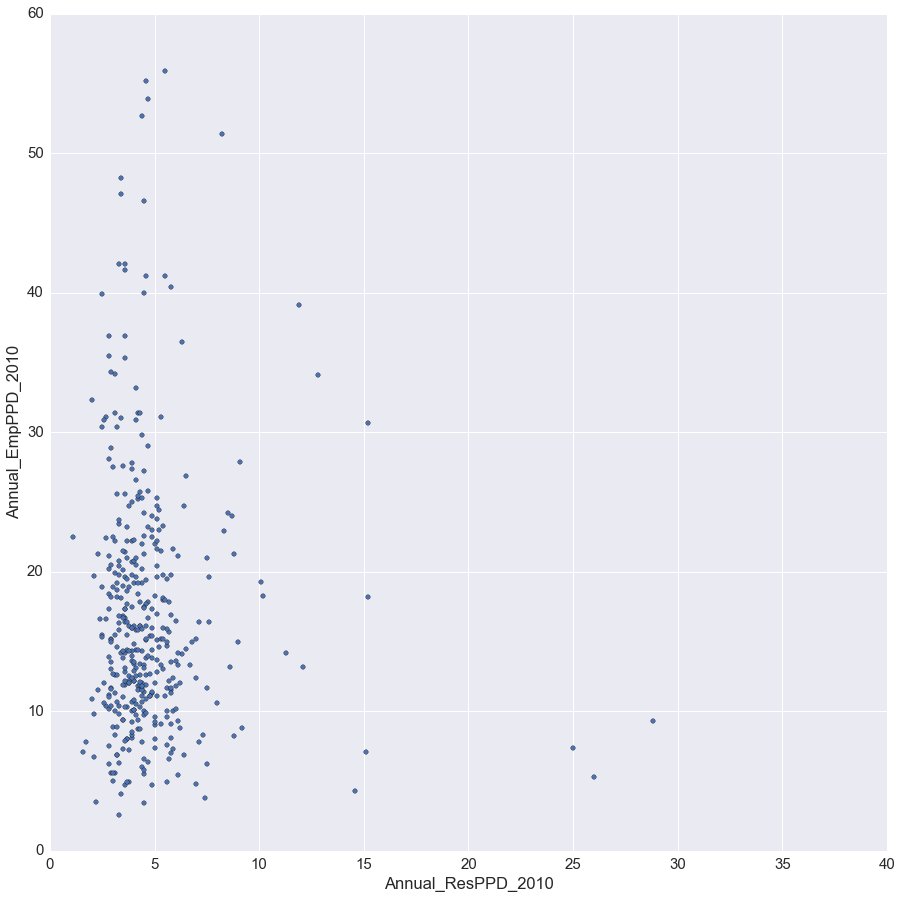

In [50]:
print max(join3_df['Annual_ResPPD_2010']), max(join3_df['Annual_EmpPPD_2010'])
join3_df.plot(kind='scatter', x='Annual_ResPPD_2010', y='Annual_EmpPPD_2010')#,c=join3_df['County']
plt.xlim(0, 40)
plt.ylim(0, 60)

In [51]:
# join3_df.to_csv('./data/data_steve.csv')

Normalized Data except column containing string values (County & Jurisdiction)

In [52]:
for col in df.columns[2:]:
    df[col] = (df[col] - df[col].mean()) / (df[col].max() - df[col].min())
#     df_norm.describe()

In [53]:
x = df.iloc[:,2:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.describe()

0           1           2           3           4           5   \
count  206.000000  206.000000  206.000000  206.000000  206.000000  206.000000   
mean     0.537670    0.458712    0.396740    0.135819    0.261268    0.057844   
std      0.203478    0.212094    0.162518    0.130183    0.173161    0.106358   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.311828    0.283951    0.062113    0.146388    0.011436   
50%      0.560000    0.440860    0.370370    0.098143    0.216730    0.029380   
75%      0.680000    0.602151    0.481481    0.173298    0.337452    0.063380   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9      ...              77  \
count  206.000000  206.000000  206.000000  206.000000     ...      206.000000   
mean     0.056893    0.058815    0.233835    0.223718     ...        0.416241   
std      0.105664    0.107110    0.124180    0.120065     ...        0.330941   
min      0.000000    0.000000    0.000000    0.000000     ...        0.000000   
25%      0.011081    0.011528    0.160280    0.154206     ...        0.128697   
50%      0.028642    0.029901    0.226168    0.217757     ...        0.265297   
75%      0.061524    0.065554    0.306075    0.288785     ...        0.594425   
max      1.000000    1.000000    1.000000    1.000000     ...        1.000000   

               78          79          80          81          82          83  \
count  206.000000  206.000000  206.000000  206.000000  206.000000  206.000000   
mean     0.408266    0.439414    0.372987    0.344255    0.390617    0.367353   
std      0.328229    0.309988    0.344849    0.297681    0.272183    0.335594   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.126530    0.153131    0.093662    0.090354    0.181899    0.108816   
50%      0.275338    0.332947    0.257384    0.205864    0.347651    0.235755   
75%      0.548502    0.664667    0.507501    0.582543    0.541869    0.420750   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               84          85          86  
count  206.000000  206.000000  206.000000  
mean     0.372711    0.416937    0.357617  
std      0.306487    0.349512    0.304845  
min      0.000000    0.000000    0.000000  
25%      0.095200    0.123161    0.107425  
50%      0.210864    0.247479    0.222372  
75%      0.679366    0.841627    0.572817  
max      1.000000    1.000000    1.000000  

[8 rows x 87 columns]